In [14]:
import pandas as pd
import csv
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [15]:
df= pd.read_csv('water1.csv', encoding='latin1')
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [16]:
column1=df.columns
print(column1)

Index(['STATION CODE', 'LOCATIONS', 'STATE', 'Temp', 'D.O. (mg/l)', 'PH',
       'CONDUCTIVITY (µmhos/cm)', 'B.O.D. (mg/l)',
       'NITRATENAN N+ NITRITENANN (mg/l)', 'FECAL COLIFORM (MPN/100ml)',
       'TOTAL COLIFORM (MPN/100ml)Mean', 'year'],
      dtype='object')


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1991 entries, 0 to 1990
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   STATION CODE                      1991 non-null   object
 1   LOCATIONS                         1991 non-null   object
 2   STATE                             1991 non-null   object
 3   Temp                              1991 non-null   object
 4   D.O. (mg/l)                       1991 non-null   object
 5   PH                                1991 non-null   object
 6   CONDUCTIVITY (µmhos/cm)           1991 non-null   object
 7   B.O.D. (mg/l)                     1991 non-null   object
 8   NITRATENAN N+ NITRITENANN (mg/l)  1991 non-null   object
 9   FECAL COLIFORM (MPN/100ml)        1991 non-null   object
 10  TOTAL COLIFORM (MPN/100ml)Mean    1991 non-null   object
 11  year                              1991 non-null   int64 
dtypes: int64(1), object(

In [18]:
df= df.rename(columns={"D.O. (mg/l)": "DO", "CONDUCTIVITY (µmhos/cm)": "Conductivity", "B.O.D. (mg/l)": "BOD", "NITRATENAN N+ NITRITENANN (mg/l)": "NI", "FECAL COLIFORM (MPN/100ml)": "Fec_col", "TOTAL COLIFORM (MPN/100ml)Mean": "Tot_col"})

In [19]:
column1=df.columns
print(column1)

Index(['STATION CODE', 'LOCATIONS', 'STATE', 'Temp', 'DO', 'PH',
       'Conductivity', 'BOD', 'NI', 'Fec_col', 'Tot_col', 'year'],
      dtype='object')


**DATA PRE PROCESSING: (Removing NAN and Wrong values)**

In [20]:
new_df1=df
new_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1991 entries, 0 to 1990
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   STATION CODE  1991 non-null   object
 1   LOCATIONS     1991 non-null   object
 2   STATE         1991 non-null   object
 3   Temp          1991 non-null   object
 4   DO            1991 non-null   object
 5   PH            1991 non-null   object
 6   Conductivity  1991 non-null   object
 7   BOD           1991 non-null   object
 8   NI            1991 non-null   object
 9   Fec_col       1991 non-null   object
 10  Tot_col       1991 non-null   object
 11  year          1991 non-null   int64 
dtypes: int64(1), object(11)
memory usage: 186.8+ KB


In [21]:
def convert_to_numeric(df):
    num_col = df.shape[1]
    # Start from index 3
    for index in range(3, num_col):
        col_name = df.iloc[:, index].name
        df[col_name] = pd.to_numeric(df[col_name], errors="coerce")
    return df

new_df1= convert_to_numeric(new_df1)
new_df1.dtypes

STATION CODE     object
LOCATIONS        object
STATE            object
Temp            float64
DO              float64
PH              float64
Conductivity    float64
BOD             float64
NI              float64
Fec_col         float64
Tot_col         float64
year              int64
dtype: object

In [22]:

keys1=list(new_df1.keys())
keys2=keys1[3:-1]
print(keys2)

['Temp', 'DO', 'PH', 'Conductivity', 'BOD', 'NI', 'Fec_col', 'Tot_col']


In [23]:
nan_count_in_column1=[]
print("No of nan values in the dataset: ")
for i in keys2:
  nan_count_in_column1.append(new_df1[i].isna().sum())
  print(i+":"+str(nan_count_in_column1[-1]))

No of nan values in the dataset: 
Temp:92
DO:31
PH:8
Conductivity:25
BOD:43
NI:225
Fec_col:316
Tot_col:132


In [24]:
# Calculate the median for the 'TEMP' column, ignoring NaN values
custom_med = new_df1['Temp'].median(skipna=True)

print(f"Custom median value: {custom_med}")

# Replace NaN values in the 'Temp' column with the calculated median
new_df1['Temp'].fillna(custom_med, inplace=True)

mean_p=new_df1['Temp'].mean()
print("mean",mean_p)

# Count, standard deviation, and percentiles
description = new_df1['DO'].describe()
count = description.loc['count']
std = description.loc['std']
percentiles_25 = description.loc['25%']
percentiles_50 = description.loc['50%']
percentiles_75 = description.loc['75%']

print("Count:", count)
print("Standard Deviation:", std)
print("25th Percentile:", percentiles_25)
print("50th Percentile:", percentiles_50)
print("75th Percentile:", percentiles_75)
#print(df)
print(new_df1['Temp'].max())
print(new_df1['Temp'].min())
#print(new_df1['Temp'].dtype)
#print(new_df1['Temp'].to_string())


Custom median value: 27.0
mean 26.24632697137117
Count: 1960.0
Standard Deviation: 1.3329376587526636
25th Percentile: 5.9
50th Percentile: 6.7
75th Percentile: 7.2
35.0
10.0


In [25]:
# Calculate the median for the 'DO' column, ignoring NaN values
custom_med = new_df1['DO'].median(skipna=True)

print(f"Custom median value: {custom_med}")
new_df1['DO'] = new_df1['DO'].apply(lambda x: x if x >=0.6 else custom_med)
# Replace NaN values in the 'PH' column with the calculated median
new_df1['DO'].fillna(custom_med, inplace=True)

mean_p=new_df1['DO'].mean()
print("mean",mean_p)

description = new_df1['DO'].describe()
# Count, standard deviation, and percentiles
count = description.loc['count']
std = description.loc['std']
percentiles_25 = description.loc['25%']
percentiles_50 = description.loc['50%']
percentiles_75 = description.loc['75%']

print("Count:", count)
print("Standard Deviation:", std)
print("25th Percentile:", percentiles_25)
print("50th Percentile:", percentiles_50)
print("75th Percentile:", percentiles_75)
print("max",new_df1['DO'].max())
print("min",new_df1['DO'].min())
#print(new_df1['DO'].dtype)
#print(new_df1['DO'].to_string())
#print(new_df1['DO'])


Custom median value: 6.7
mean 6.407166248116524
Count: 1991.0
Standard Deviation: 1.3012274815649398
25th Percentile: 6.0
50th Percentile: 6.7
75th Percentile: 7.2
max 11.4
min 0.6


In [26]:
# Calculate the median for the 'PH' column, ignoring NaN values
custom_med = new_df1['PH'].median(skipna=True)

print(f"Custom median value: {custom_med}")

# Replace NaN values in the 'PH' column with the calculated median
new_df1['PH'].fillna(custom_med, inplace=True)

new_df1['PH'] = new_df1['PH'].apply(lambda x: x if x <= 14 else custom_med)
mean_p=new_df1['PH'].mean()
print("mean",mean_p)

# Assuming 'df' is already loaded from the CSV file
description = new_df1['PH'].describe()

# Count, standard deviation, and percentiles
count = description.loc['count']
std = description.loc['std']
percentiles_25 = description.loc['25%']
percentiles_50 = description.loc['50%']
percentiles_75 = description.loc['75%']

print("Count:", count)
print("Standard Deviation:", std)
print("25th Percentile:", percentiles_25)
print("50th Percentile:", percentiles_50)
print("75th Percentile:", percentiles_75)
#print(new_df1)
print("max",new_df1['PH'].max())
print("min",new_df1['PH'].min())
#print(new_df1['PH'].dtype)
#print(new_df1['PH'].to_string())


Custom median value: 7.3
mean 7.231495228528377
Count: 1991.0
Standard Deviation: 0.6341957094159052
25th Percentile: 6.9
50th Percentile: 7.3
75th Percentile: 7.6
max 9.01
min 0.0


In [27]:
# Calculate the median for the 'PH' column, ignoring NaN values
custom_med = new_df1['Conductivity'].median(skipna=True)
print(f"Custom median value: {custom_med}")

# Replace NaN values in the 'PH' column with the calculated median
new_df1['Conductivity'].fillna(custom_med, inplace=True)

new_df1['Conductivity'] = new_df1['Conductivity'].apply(lambda x: x if (x <= 9753 and x >= 11) else custom_med)

mean_p=new_df1['Conductivity'].mean()
print("mean",mean_p)

# Assuming 'df' is already loaded from the CSV file
description = new_df1['Conductivity'].describe()

# Count, standard deviation, and percentiles
count = description.loc['count']
std = description.loc['std']
#print(new_df1['Conductivity'].dtype)
#print(new_df1['Conductivity'].to_string())
percentiles_25 = description.loc['25%']
percentiles_50 = description.loc['50%']
percentiles_75 = description.loc['75%']

print("Count:", count)
print("Standard Deviation:", std)
print("25th Percentile:", percentiles_25)
print("50th Percentile:", percentiles_50)
print("75th Percentile:", percentiles_75)
print(new_df1['Conductivity'].max())
print(new_df1['Conductivity'].min())

#print(df)


Custom median value: 183.0
mean 541.099964841788
Count: 1991.0
Standard Deviation: 1210.3340817352864
25th Percentile: 93.0
50th Percentile: 183.0
75th Percentile: 385.5
9753.0
11.0


In [28]:
# Calculate the median for the 'PH' column, ignoring NaN values
custom_med = new_df1['BOD'].median(skipna=True)

print(f"Custom median value: {custom_med}")

# Replace NaN values in the 'PH' column with the calculated median
new_df1['BOD'].fillna(custom_med, inplace=True)

new_df1['BOD'] = new_df1['BOD'].apply(lambda x: x if x <= 88 else custom_med)
mean_p=new_df1['BOD'].mean()
print("mean",mean_p)

# Assuming 'df' is already loaded from the CSV file
description = new_df1['BOD'].describe()

# Count, standard deviation, and percentiles
count = description.loc['count']
std = description.loc['std']

#print(new_df1['BOD'].dtype)
#print(new_df1['BOD'].to_string())
percentiles_25 = description.loc['25%']
percentiles_50 = description.loc['50%']
percentiles_75 = description.loc['75%']

print("Count:", count)
print("Standard Deviation:", std)
print("25th Percentile:", percentiles_25)
print("50th Percentile:", percentiles_50)
print("75th Percentile:", percentiles_75)
#print(df)
print(new_df1['BOD'].max())
print(new_df1['BOD'].min())

Custom median value: 1.8965
mean 4.315875439477649
Count: 1991.0
Standard Deviation: 7.755725600646085
25th Percentile: 1.2
50th Percentile: 1.8965
75th Percentile: 3.5
88.0
0.1


In [30]:

custom_med = new_df1['NI'].median(skipna=True)
print(f"Custom median value: {custom_med}")

new_df1['NI'] = new_df1['NI'].apply(lambda x: x if x <=20.45 else custom_med)
# Replace NaN values in the 'CONDUCTIVITY (µmhos/cm)' column with the calculated median
new_df1['NI'].fillna(custom_med, inplace=True)

mean_p = new_df1['NI'].mean()
print("Mean:", mean_p)

# Calculate statistical information
description = new_df1['NI'].describe()

# Extract statistical information
count = description.loc['count']
std = description.loc['std']
percentiles_25 = description.loc['25%']
percentiles_50 = description.loc['50%']
percentiles_75 = description.loc['75%']

print("Count:", count)
print("Standard Deviation:", std)
print("25th Percentile:", percentiles_25)
print("50th Percentile:", percentiles_50)
print("75th Percentile:", percentiles_75)
print("Max:", new_df1['NI'].max())
print("Min:", new_df1['NI'].min())
#print("Data type:", new_df1['NI'].dtype)
# Print a portion of the DataFrame
#print(df.head())

Custom median value: 0.516
Mean: 1.4020567553992969
Count: 1991.0
Standard Deviation: 2.6973770386686775
25th Percentile: 0.28
50th Percentile: 0.516
75th Percentile: 1.17
Max: 20.45
Min: 0.0


In [31]:

custom_med = new_df1['Fec_col'].median(skipna=True)

print(f"Custom median value: {custom_med}")

# Replace NaN values in the 'PH' column with the calculated median
new_df1['Fec_col'].fillna(custom_med, inplace=True)

new_df1['Fec_col'] = new_df1['Fec_col'].apply(lambda x: x if x <= 2350 else custom_med)
mean_p=new_df1['Fec_col'].mean()
print("mean",mean_p)

# Assuming 'df' is already loaded from the CSV file
description = new_df1['Fec_col'].describe()

# Count, standard deviation, and percentiles
count = description.loc['count']
std = description.loc['std']
percentiles_25 = description.loc['25%']
percentiles_50 = description.loc['50%']
percentiles_75 = description.loc['75%']

print("Count:", count)
print("Standard Deviation:", std)
print("25th Percentile:", percentiles_25)
print("50th Percentile:", percentiles_50)
print("75th Percentile:", percentiles_75)
print(new_df1['Fec_col'].max())
print(new_df1['Fec_col'].min())
#print(new_df1['Fec_col'].dtype)
#print(new_df1['Fec_col'].to_string())
#print(df)


Custom median value: 221.0
mean 306.8231551983928
Count: 1991.0
Standard Deviation: 423.57658783593104
25th Percentile: 41.0
50th Percentile: 221.0
75th Percentile: 265.0
2350.0
0.0


In [32]:

custom_med =new_df1['Tot_col'].median(skipna=True)

print(f"Custom median value: {custom_med}")

# Replace NaN values in the 'PH' column with the calculated median
new_df1['Tot_col'].fillna(custom_med, inplace=True)

new_df1['Tot_col']= new_df1['Tot_col'].apply(lambda x: x if x <= 3000 else custom_med)
mean_p=new_df1['Tot_col'].mean()
print("mean",mean_p)

# Assuming 'df' is already loaded from the CSV file
description = new_df1['Tot_col'].describe()

# Count, standard deviation, and percentiles
count = description.loc['count']
std = description.loc['std']
percentiles_25 = description.loc['25%']
percentiles_50 = description.loc['50%']
percentiles_75 = description.loc['75%']
print("Count:", count)
print("Standard Deviation:", std)
print("25th Percentile:", percentiles_25)
print("50th Percentile:", percentiles_50)
print("75th Percentile:", percentiles_75)
#print(df)
print(new_df1['Tot_col'].max())
print(new_df1['Tot_col'].min())

Custom median value: 468.0
mean 537.5113008538423
Count: 1991.0
Standard Deviation: 600.0528959077707
25th Percentile: 118.0
50th Percentile: 468.0
75th Percentile: 550.0
3000.0
0.0


In [33]:
new_df1.describe()

,Temp,DO,PH,Conductivity,BOD,NI,Fec_col,Tot_col,year
count,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000
mean,26.246327,6.407166,7.231495,541.099965,4.315875,1.402057,306.823155,537.511301,2010.038172
std,3.291836,1.301227,0.634196,1210.334082,7.755726,2.697377,423.576588,600.052896,3.057333
min,10.000000,0.600000,0.000000,11.000000,0.100000,0.000000,0.000000,0.000000,2003.000000
25%,25.000000,6.000000,6.900000,93.000000,1.200000,0.280000,41.000000,118.000000,2008.000000
50%,27.000000,6.700000,7.300000,183.000000,1.896500,0.516000,221.000000,468.000000,2011.000000
75%,28.300000,7.200000,7.600000,385.500000,3.500000,1.170000,265.000000,550.000000,2013.000000
max,35.000000,11.400000,9.010000,9753.000000,88.000000,20.450000,2350.000000,3000.000000,2014.000000


In [34]:
# Check the data type of the 'LOCATIONS' column
print(df['LOCATIONS'].dtype)

# Fill missing values in the 'LOCATIONS' and 'STATE' columns with 'Unknown'
df['LOCATIONS'].fillna('Unknown', inplace=True)
df['STATE'].fillna('Unknown', inplace=True)

# Save the modified DataFrame to a new CSV file
df.to_csv('File1.csv',index=False)

object


In [35]:
# Assuming you have a DataFrame named 'df'
# You want to write it to a CSV file named 'output_file.csv'

new_df1.to_csv('output_file.csv', index=False)


**TO FIND WQI(WATER QUALITY INDEX):**

In [36]:
parameters=['DO','PH','Conductivity','BOD','NI','Fec_col','Tot_col']
parameters
len(parameters)

7

In [38]:
wqi1=[]

In [39]:
def calculate_wqi(parameters, measured_values, ideal_values, expected_values):
    N = len(parameters)
    qis = []
    wis = []

    for i in range(N):
        qi = 100 * (measured_values[i] - ideal_values[i]) / (expected_values[i] - ideal_values[i])
        wi = 1 / expected_values[i]
        qis.append(qi)
        wis.append(wi)

    K = 1 / sum(wis)

    WQI = sum([qis[i] * wis[i] for i in range(N)]) * K

    return WQI

#parameters=['DO','PH','Conductivity','BOD','NI','Fec_col','Tot_col']
expected_values =[10,8.5,1000,5,45,100,1000]  # Corresponding ideal values for each parameter
ideal_values = [14.6,7.0,0,0,0,0,0]  # Corresponding expected values for each parameter
wqi1=[]
measured_values = new_df1[parameters].values.tolist()
for i in range(len(new_df1)):   #access row wise data and give them to the fn call
  m=measured_values[i]
  #print(m)
  wqi_value = calculate_wqi(parameters, m, ideal_values, expected_values)
  wqi1.append(wqi_value)
#print(f"The Water Quality Index (WQI) is {wqi_value:.2f}")


In [41]:
print(wqi1)

[63.77822337433073, 69.05100963919607, 58.288544744685844, 79.30172268451904, 69.41881283211862, 69.0237269438547, 53.174082673428394, 48.20248518078768, 74.41135963757493, 75.7272076699346, 53.48449393871298, 87.63390348310183, 51.2807586628945, 51.92401805249501, 69.24811811096689, 73.25003745330915, 72.58759306029312, 50.52664825305469, 86.26999875341971, 62.30182012601083, 48.844727084164866, 72.08173246290724, 97.77874758090752, 75.04363003062225, 72.97846008483454, 69.06665971404679, 47.32311579808531, 84.91504990653442, 41.756542226649536, 96.15345082632062, 97.33126126394296, 96.00637718053724, 95.58989618026554, 143.8601974180695, 92.59551342896783, 101.02523197293968, 121.35696513460272, 148.218853220202, 91.58748708000584, 344.3667159568985, 80.2494444612146, 106.38840364493369, 120.47409502044282, 96.33141134969428, 94.90013912926088, 122.64840466371959, 100.87384851338312, 105.98563229570897, 95.02290664650896, 81.33999067999557, 73.5196801068146, 77.93398829807691, 77.476

In [42]:
print(str(len(wqi1))+"\n"+str(max(wqi1))+"\n"+str(min(wqi1)))

1991
848.5748917627315
-65.31192245739544


In [43]:
new_df1['WQI'] =wqi1

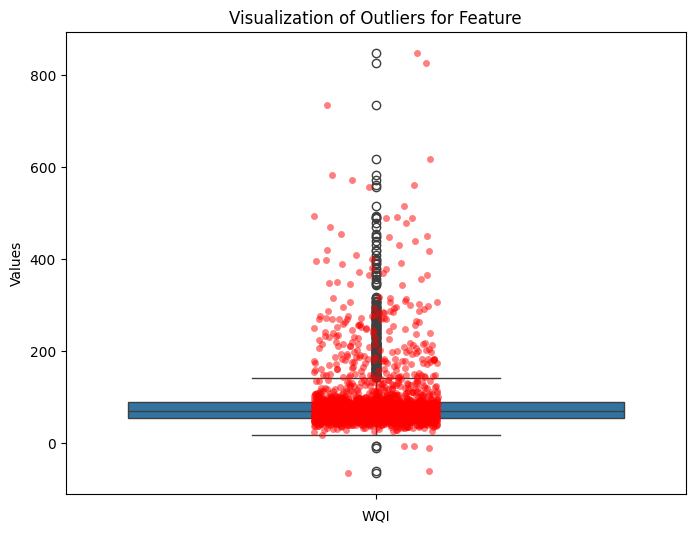

In [44]:
#outlier detection
import matplotlib.pyplot as plt
import seaborn as sns

# Create a box plot to identify outliers
plt.figure(figsize=(8, 6))
sns.boxplot(data=new_df1['WQI'])

# Overlay a scatter plot to highlight outliers
sns.stripplot(data=new_df1['WQI'], color='red', alpha=0.5)

# Add labels and title
plt.xlabel('WQI')
plt.ylabel('Values')
plt.title('Visualization of Outliers for Feature')

# Show the plot
plt.show()


In [45]:
new_df1.describe()

,Temp,DO,PH,Conductivity,BOD,NI,Fec_col,Tot_col,year,WQI
count,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000
mean,26.246327,6.407166,7.231495,541.099965,4.315875,1.402057,306.823155,537.511301,2010.038172,88.819910
std,3.291836,1.301227,0.634196,1210.334082,7.755726,2.697377,423.576588,600.052896,3.057333,73.661874
min,10.000000,0.600000,0.000000,11.000000,0.100000,0.000000,0.000000,0.000000,2003.000000,-65.311922
25%,25.000000,6.000000,6.900000,93.000000,1.200000,0.280000,41.000000,118.000000,2008.000000,54.196075
50%,27.000000,6.700000,7.300000,183.000000,1.896500,0.516000,221.000000,468.000000,2011.000000,68.341103
75%,28.300000,7.200000,7.600000,385.500000,3.500000,1.170000,265.000000,550.000000,2013.000000,88.597681
max,35.000000,11.400000,9.010000,9753.000000,88.000000,20.450000,2350.000000,3000.000000,2014.000000,848.574892


In [46]:
# Define labeling thresholds
thresholds = {
    0: (0, 26),
    1: (26, 50),
    2: (50, 75),
    3: (75,100),
}
#clean=0, unclean=1, polluted=2, highly polluted=3
# Function to label WQI values
def label_wqi(wqi_value):
    for label, (lower, upper) in thresholds.items():
        if lower <= wqi_value < upper:
            return label
    return "Unknown"  # Handle cases outside defined thresholds

# Apply labeling function to create a new column 'WQI Label'

new_df1['WQI Label'] = new_df1['WQI'].apply(label_wqi)

In [47]:
new_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1991 entries, 0 to 1990
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   STATION CODE  1991 non-null   object 
 1   LOCATIONS     1991 non-null   object 
 2   STATE         1991 non-null   object 
 3   Temp          1991 non-null   float64
 4   DO            1991 non-null   float64
 5   PH            1991 non-null   float64
 6   Conductivity  1991 non-null   float64
 7   BOD           1991 non-null   float64
 8   NI            1991 non-null   float64
 9   Fec_col       1991 non-null   float64
 10  Tot_col       1991 non-null   float64
 11  year          1991 non-null   int64  
 12  WQI           1991 non-null   float64
 13  WQI Label     1991 non-null   object 
dtypes: float64(9), int64(1), object(4)
memory usage: 217.9+ KB


In [48]:
columns1=new_df1.columns
columns1

Index(['STATION CODE', 'LOCATIONS', 'STATE', 'Temp', 'DO', 'PH',
       'Conductivity', 'BOD', 'NI', 'Fec_col', 'Tot_col', 'year', 'WQI',
       'WQI Label'],
      dtype='object')

In [49]:
columns_to_drop = ['STATION CODE', 'LOCATIONS','STATE','Temp','year']
new_df2 = new_df1.drop(columns=columns_to_drop)

In [50]:
#removing instances where WQI Label="Unkown"
# Removing the samples with negative WQI
df_neg_indices = new_df2[(new_df2["WQI"] < 0)].index
new_df2.drop(df_neg_indices, axis=0, inplace=True)

df_neg_indices = new_df2[(new_df2["WQI"] >100)].index
new_df2.drop(df_neg_indices, axis=0, inplace=True)

In [51]:
new_df2.describe()

,DO,PH,Conductivity,BOD,NI,Fec_col,Tot_col,WQI
count,1630.000000,1630.000000,1630.000000,1630.000000,1630.000000,1630.000000,1630.000000,1630.000000
mean,6.674618,7.193944,465.272086,1.877829,0.846526,275.294118,534.004908,64.523551
std,1.046697,0.580261,1223.028668,1.159007,1.272901,376.351005,618.046537,15.922893
min,0.900000,2.900000,11.000000,0.100000,0.000000,0.000000,0.000000,16.809578
25%,6.300000,6.900000,79.000000,1.030750,0.240000,30.000000,94.250000,52.155859
50%,6.800000,7.200000,164.000000,1.600000,0.505500,221.000000,420.000000,63.015739
75%,7.200000,7.600000,260.000000,2.300000,0.800000,265.750000,619.500000,76.742089
max,11.400000,8.800000,9753.000000,8.000000,16.900000,2333.000000,3000.000000,99.964946


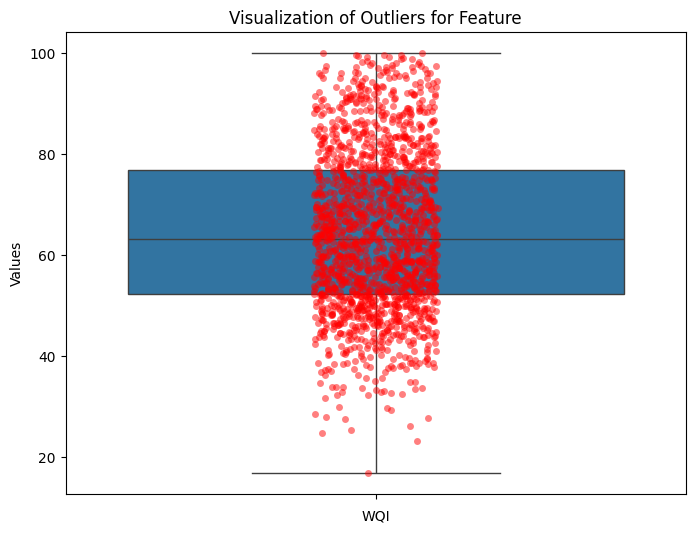

In [52]:
#outliers are removed and vistualization
import matplotlib.pyplot as plt
import seaborn as sns

# Create a box plot to identify outliers
plt.figure(figsize=(8, 6))
sns.boxplot(data=new_df2['WQI'])

# Overlay a scatter plot to highlight outliers
sns.stripplot(data=new_df2['WQI'], color='red', alpha=0.5)

# Add labels and title
plt.xlabel('WQI')
plt.ylabel('Values')
plt.title('Visualization of Outliers for Feature')

# Show the plot
plt.show()


In [53]:
new_df2['WQI Label'] = pd.to_numeric(new_df2['WQI Label'])

In [54]:
new_df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1630 entries, 0 to 1990
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   DO            1630 non-null   float64
 1   PH            1630 non-null   float64
 2   Conductivity  1630 non-null   float64
 3   BOD           1630 non-null   float64
 4   NI            1630 non-null   float64
 5   Fec_col       1630 non-null   float64
 6   Tot_col       1630 non-null   float64
 7   WQI           1630 non-null   float64
 8   WQI Label     1630 non-null   int64  
dtypes: float64(8), int64(1)
memory usage: 127.3 KB


In [55]:
new_df2.describe()

,DO,PH,Conductivity,BOD,NI,Fec_col,Tot_col,WQI,WQI Label
count,1630.000000,1630.000000,1630.000000,1630.000000,1630.000000,1630.000000,1630.000000,1630.000000,1630.000000
mean,6.674618,7.193944,465.272086,1.877829,0.846526,275.294118,534.004908,64.523551,2.074847
std,1.046697,0.580261,1223.028668,1.159007,1.272901,376.351005,618.046537,15.922893,0.687907
min,0.900000,2.900000,11.000000,0.100000,0.000000,0.000000,0.000000,16.809578,0.000000
25%,6.300000,6.900000,79.000000,1.030750,0.240000,30.000000,94.250000,52.155859,2.000000
50%,6.800000,7.200000,164.000000,1.600000,0.505500,221.000000,420.000000,63.015739,2.000000
75%,7.200000,7.600000,260.000000,2.300000,0.800000,265.750000,619.500000,76.742089,3.000000
max,11.400000,8.800000,9753.000000,8.000000,16.900000,2333.000000,3000.000000,99.964946,3.000000


In [56]:
columns2 =new_df2.columns
columns2

Index(['DO', 'PH', 'Conductivity', 'BOD', 'NI', 'Fec_col', 'Tot_col', 'WQI',
       'WQI Label'],
      dtype='object')

In [57]:
# Assuming you have a DataFrame named 'df'
# You want to write it to a CSV file named 'output_file.csv'
new_df2.to_csv('output_file1.csv', index=False)

Now we have a new dataset with only required columns(7) along with the wqi values and their respective labels. Now we have to perform SMOTE algorithm. (Refer file: output_file1.csv )

In [58]:
#count the no of instances for each class
class_counts = new_df2['WQI Label'].value_counts()
# Display the counts
print("Class counts:")
print(class_counts)

sum1=sum(class_counts)
print(sum1) #this cross checks if all the labels are included by summing the counts

Class counts:
WQI Label
2    862
3    447
1    317
0      4
Name: count, dtype: int64
1630


Note: new_df2 contains the raw data without applying SMOTE algorithm whereas new_df3 contains synthetically generated samples.

In [59]:
new_df3=new_df2
print(new_df3)

       DO   PH  Conductivity     BOD     NI  Fec_col  Tot_col        WQI  \
0     6.7  7.5         203.0  1.8965  0.100   11.000     27.0  63.778223   
1     5.7  7.2         189.0  2.0000  0.200  221.000    468.0  69.051010   
2     6.3  6.9         179.0  1.7000  0.100  221.000    468.0  58.288545   
3     5.8  6.9          64.0  3.8000  0.500  221.000    468.0  79.301723   
4     5.8  7.3          83.0  1.9000  0.400  221.000    468.0  69.418813   
...   ...  ...           ...     ...    ...      ...      ...        ...   
1986  7.9  7.3         183.0  2.7000  0.518    0.518    202.0  61.494375   
1987  7.5  7.3         183.0  2.6000  0.155    0.155    315.0  62.510840   
1988  7.6  7.3         183.0  1.2000  0.516  221.000    570.0  54.620031   
1989  7.7  7.3         183.0  1.3000  0.516  221.000    562.0  55.022379   
1990  7.6  7.3         183.0  1.1000  0.516  221.000    546.0  53.729508   

      WQI Label  
0             2  
1             2  
2             2  
3             3

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

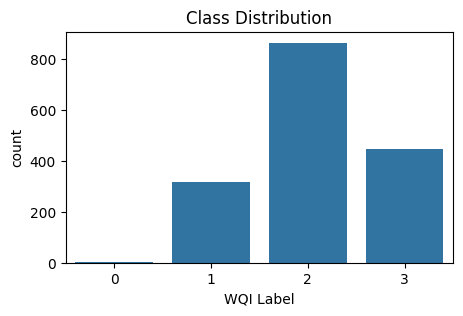

In [61]:
# Bar plot
plt.figure(figsize=(5,3))
sns.countplot(x='WQI Label', data=new_df2)
plt.title('Class Distribution')
plt.show()

In [62]:
X=new_df2.drop('WQI Label',axis=1)
y=new_df2['WQI Label']
from imblearn.over_sampling import SMOTE
# Create an instance of SMOTE with the specified sampling_strategy
smote = SMOTE(sampling_strategy='auto', random_state=42)
n_neighbors = min(3, len(X)-1)

# Apply SMOTE to generate synthetic samples
X_resampled, y_resampled = SMOTE(random_state=42, k_neighbors=n_neighbors).fit_resample(X,y)

print(X_resampled)
print(y_resampled)

            DO        PH  Conductivity       BOD        NI      Fec_col  \
0     6.700000  7.500000    203.000000  1.896500  0.100000    11.000000   
1     5.700000  7.200000    189.000000  2.000000  0.200000   221.000000   
2     6.300000  6.900000    179.000000  1.700000  0.100000   221.000000   
3     5.800000  6.900000     64.000000  3.800000  0.500000   221.000000   
4     5.800000  7.300000     83.000000  1.900000  0.400000   221.000000   
...        ...       ...           ...       ...       ...          ...   
3443  6.350880  8.036840    489.930014  3.856162  3.482658    15.526406   
3444  6.667157  7.648111    216.658448  3.468389  4.860658   221.000000   
3445  7.436680  8.634939    436.200807  2.110040  0.297591   221.000000   
3446  6.380433  7.586041    564.468301  3.739902  1.034560    58.443666   
3447  6.900000  6.831153     57.317750  0.584424  0.427102  1926.591945   

         Tot_col        WQI  
0      27.000000  63.778223  
1     468.000000  69.051010  
2     468

In [63]:
target=new_df2['WQI Label']
print('Original sample:',np.unique(target,return_counts=True))
print("After SMOTE:",np.unique(y_resampled,return_counts=True))
len(y_resampled)


Original sample: (array([0, 1, 2, 3], dtype=int64), array([  4, 317, 862, 447], dtype=int64))
After SMOTE: (array([0, 1, 2, 3], dtype=int64), array([862, 862, 862, 862], dtype=int64))


3448

In [64]:
vvv=['DO', 'PH', 'Conductivity', 'BOD', 'NI', 'Fec_col', 'Tot_col', 'WQI']
X_train_resampled = pd.DataFrame(X_resampled, columns=vvv)
y_train_resampled= pd.DataFrame(y_resampled, columns=['WQI Label'])

new_df3= pd.concat([X_train_resampled, y_train_resampled], axis=1)
new_df3.describe()
#print(len(new_df3))

,DO,PH,Conductivity,BOD,NI,Fec_col,Tot_col,WQI,WQI Label
count,3448.000000,3448.000000,3448.000000,3448.000000,3448.000000,3448.000000,3448.000000,3448.000000,3448.000000
mean,6.685838,6.468156,446.119091,2.174590,1.279710,220.386056,448.951590,53.308108,1.500000
std,0.895531,1.382905,1111.231255,1.436667,1.398703,357.294839,575.548367,23.660600,1.118196
min,0.900000,2.900000,11.000000,0.100000,0.000000,0.000000,0.000000,16.809578,0.000000
25%,6.364732,5.787426,77.000000,1.054775,0.310000,23.365181,63.000000,25.955713,0.750000
50%,6.743225,6.900000,181.755423,1.700000,0.600000,99.153564,280.842592,49.995916,1.500000
75%,7.177955,7.400000,364.446424,3.162033,2.086465,221.000000,472.591814,74.983205,2.250000
max,11.400000,8.800000,9753.000000,8.000000,16.900000,2333.000000,3000.000000,99.964946,3.000000


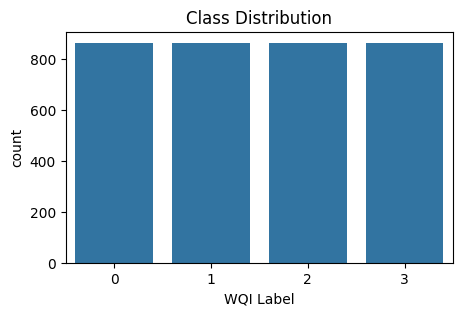

In [65]:

plt.figure(figsize=(5,3))
sns.countplot(x='WQI Label', data=new_df3)
plt.title('Class Distribution')
plt.show()

Data Splitting


In [66]:
#Data splitting
from sklearn.model_selection import train_test_split
X=new_df3.drop('WQI Label',axis=1)
y=new_df3['WQI Label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)


MODELS IMPLEMENTATION:

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier


RANDOMFOREST:

In [68]:
#from google.colab import drive
#The parameters that were utilized were as follows: estimators = 300, maximum depth = 100 and minimum sample split = 3
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score

X=new_df3.drop('WQI Label',axis=1)
y=new_df3['WQI Label']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100,
                                       criterion='gini',
                                       max_depth=None,
                                       min_samples_split=2,
                                       min_samples_leaf=1,
                                       min_weight_fraction_leaf=0,
                                       #max_features='auto',
                                       max_leaf_nodes=None,
                                       min_impurity_decrease=0,
                                       bootstrap=True,
                                       oob_score=False,
                                       n_jobs=None,
                                       random_state=None,
                                       verbose=0,
                                       warm_start=False,
                                       class_weight=None,
                                       ccp_alpha=0,
                                       max_samples=None)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_test)

# Calculate evaluation metrics
f1 = f1_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)

# Print the evaluation metrics
print("F1 Score:", f1)
print("Recall:", recall)
print("Precision:", precision)
print("Accuracy:", accuracy)


F1 Score: 0.9988399779050664
Recall: 0.9988399071925754
Precision: 0.9988450631606084
Accuracy: 0.9988399071925754


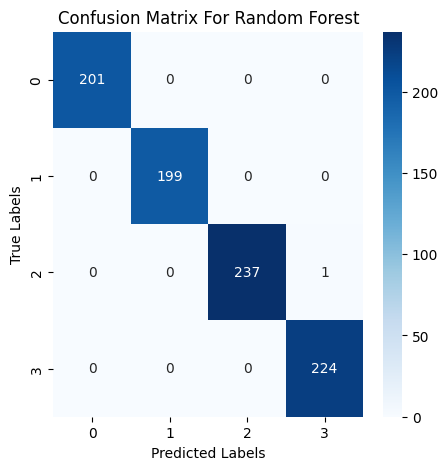

In [69]:
#CONFUSION MATRIX :
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(5, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix For Random Forest")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


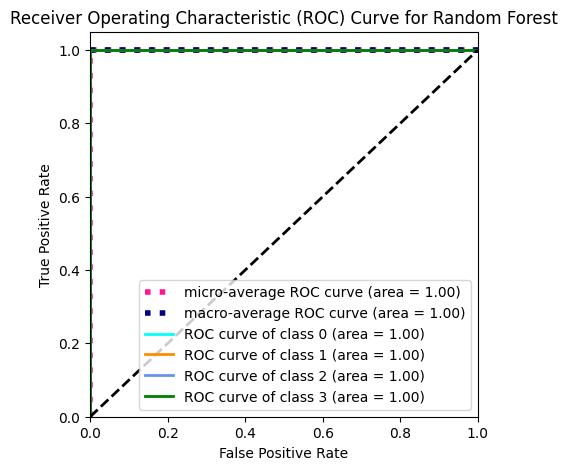

In [70]:
#ROC CURVE FOR RANDOM FOREST
from sklearn.metrics import roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt


y_scores = rf_classifier.predict_proba(X_test)  # predicted probabilities for each sample
n_classes=4
# Compute binary indicators for each class
y_test_binary = np.zeros((y_test.shape[0], n_classes))
for i in range(n_classes):
    y_test_binary[:, i] = (y_test == i)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binary[:, i], y_scores[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binary.ravel(), y_scores.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= n_classes
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(figsize=(5,5))
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = ['aqua', 'darkorange', 'cornflowerblue', 'green']  # Adjust colors as needed
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Random Forest')
plt.legend(loc="lower right")
plt.show()


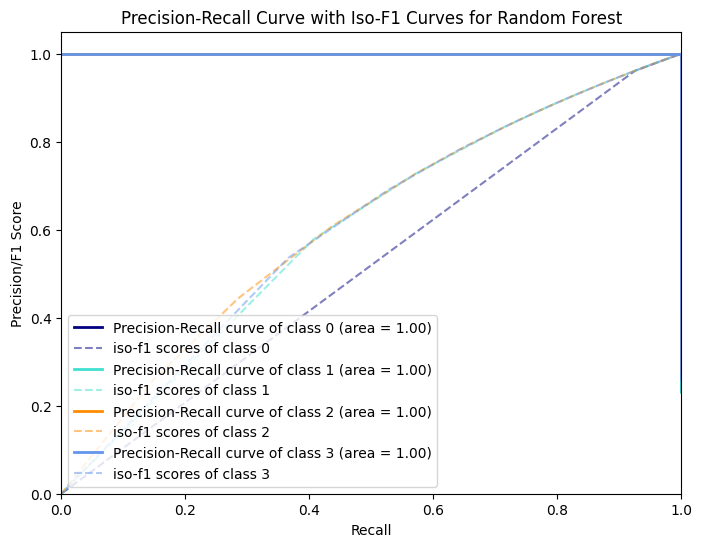

In [71]:
#precision recall curve:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
import numpy as np

y_scores = rf_classifier.predict_proba(X_test) 
n_classes = 4 

# Compute binary indicators for each class
y_test_binary = np.zeros((y_test.shape[0], n_classes))
for i in range(n_classes):
    y_test_binary[:, i] = (y_test == i)

# Compute Precision-Recall curve and area for each class
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test_binary[:, i], y_scores[:, i])
    average_precision[i] = average_precision_score(y_test_binary[:, i], y_scores[:, i])

# Plot all Precision-Recall curves
plt.figure(figsize=(8, 6))
colors = ['navy', 'turquoise', 'darkorange', 'cornflowerblue']  # Adjust colors as needed
for i, color in zip(range(n_classes), colors):
    plt.plot(recall[i], precision[i], color=color, lw=2,
             label='Precision-Recall curve of class {0} (area = {1:0.2f})'.format(i, average_precision[i]))

    # Calculate F1 scores
    f1_scores = 2 * (precision[i] * recall[i]) / (precision[i] + recall[i])
    plt.plot(recall[i], f1_scores, linestyle='--', color=color, alpha=0.5,label='iso-f1 scores of class {0}'.format(i, average_precision[i]))  # Plot iso-F1 curves


plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision/F1 Score')
plt.title('Precision-Recall Curve with Iso-F1 Curves for Random Forest')
plt.legend(loc="lower left")
plt.show()


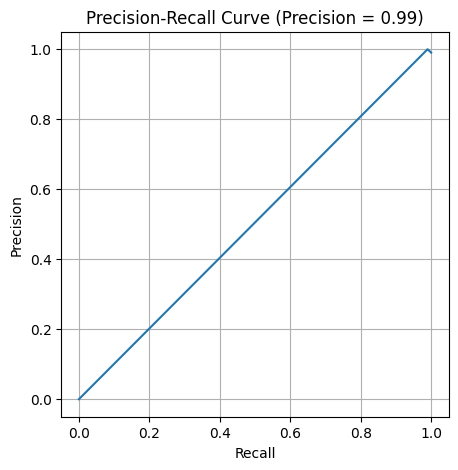

In [72]:
import matplotlib.pyplot as plt
import numpy as np

# Desired precision value
precision_threshold = 0.99

# Calculate recall values
recall = np.linspace(0, 1, 100)

# Calculate precision values based on the desired precision threshold
precision = np.where(recall >= precision_threshold, precision_threshold, recall / precision_threshold)

# Plotting the Precision-Recall curve
plt.figure(figsize=(5,5))
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Precision = 0.99)')
plt.grid(True)
plt.show()


SVM:

In [73]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split


X=new_df3.drop('WQI Label',axis=1)
y=new_df3['WQI Label']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize SVM classifier
svm_classifier = SVC(C=1,
                     kernel='rbf',
                     degree=3,
                     gamma='scale',
                     coef0=0,
                     shrinking=True,
                     probability=False,
                     tol=0.001,
                     cache_size=200,
                     class_weight=None,
                     verbose=False,
                     #max_iter=1,
                     decision_function_shape='ovr',
                     break_ties=False,
                     random_state=None)  # You can change the kernel as needed (e.g., 'linear', 'rbf', 'poly')

# Train classifier
svm_classifier.fit(X_train, y_train)

# Predict on test data
y_pred = svm_classifier.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.5521739130434783
Precision: 0.6017622028510632
Recall: 0.5521739130434783
F1 Score: 0.5480944293017372


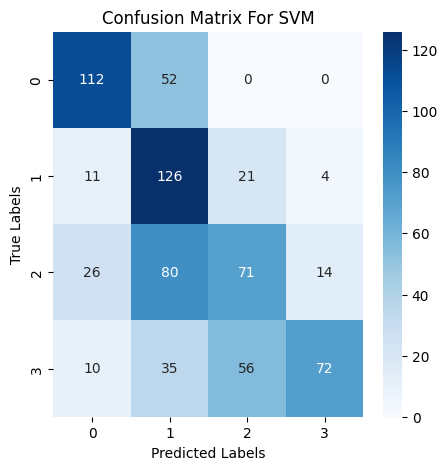

In [74]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(5, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix For SVM")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


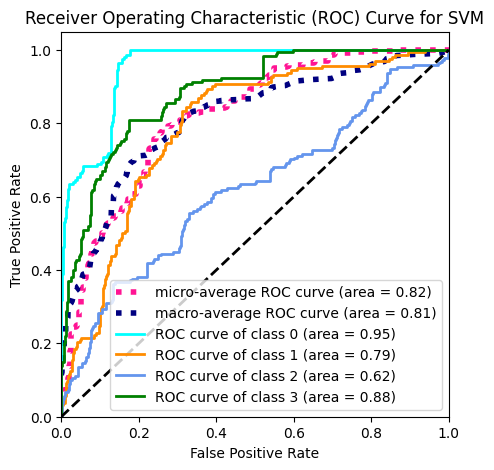

In [75]:
from sklearn.metrics import roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt

y_scores = svm_classifier.decision_function(X_test)  # decision scores for each sample

# Compute binary indicators for each class
y_test_binary = np.zeros((y_test.shape[0], n_classes))
for i in range(n_classes):
    y_test_binary[:, i] = (y_test == i)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binary[:, i], y_scores[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binary.ravel(), y_scores.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= n_classes
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(figsize=(5, 5))
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = ['aqua', 'darkorange', 'cornflowerblue','green']  # Adjust colors as needed
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for SVM')
plt.legend(loc="lower right")
plt.show()


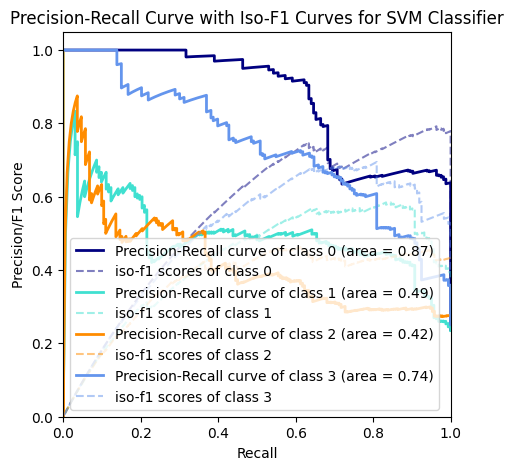

In [76]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score
import numpy as np

y_scores_svm = svm_classifier.decision_function(X_test)  # decision function scores for each sample
n_classes = 4

# Compute binary indicators for each class
y_test_binary_svm = np.zeros((y_test.shape[0], n_classes))
for i in range(n_classes):
    y_test_binary_svm[:, i] = (y_test == i)

# Compute Precision-Recall curve and area for each class
precision_svm = dict()
recall_svm = dict()
average_precision_svm = dict()
for i in range(n_classes):
    precision_svm[i], recall_svm[i], _ = precision_recall_curve(y_test_binary_svm[:, i], y_scores_svm[:, i])
    average_precision_svm[i] = average_precision_score(y_test_binary_svm[:, i], y_scores_svm[:, i])

# Plot all Precision-Recall curves
plt.figure(figsize=(5,5))
colors = ['navy', 'turquoise', 'darkorange', 'cornflowerblue']  # Adjust colors as needed
for i, color in zip(range(n_classes), colors):
    plt.plot(recall_svm[i], precision_svm[i], color=color, lw=2,
             label='Precision-Recall curve of class {0} (area = {1:0.2f})'.format(i, average_precision_svm[i]))

    # Calculate F1 scores, avoid division by zero
    f1_scores_svm = np.where(precision_svm[i] + recall_svm[i] != 0,
                             2 * (precision_svm[i] * recall_svm[i]) / (precision_svm[i] + recall_svm[i]),
                             0)
    plt.plot(recall_svm[i], f1_scores_svm, linestyle='--', color=color, alpha=0.5,
             label='iso-f1 scores of class {0}'.format(i))  # Plot iso-F1 curves

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision/F1 Score')
plt.title('Precision-Recall Curve with Iso-F1 Curves for SVM Classifier')
plt.legend(loc="lower left")
plt.show()


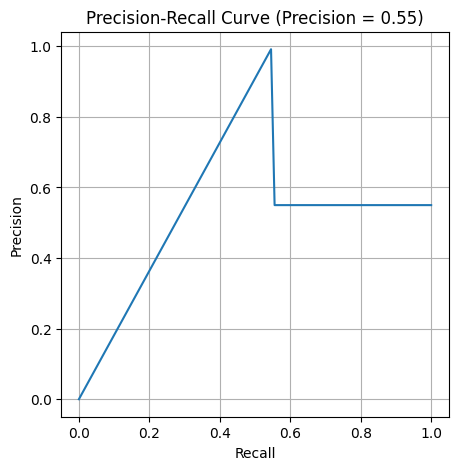

In [77]:
import matplotlib.pyplot as plt
import numpy as np

precision_threshold = 0.55
recall = np.linspace(0, 1, 100)

# Calculate precision values based on the desired precision threshold
precision = np.where(recall >= precision_threshold, precision_threshold, recall / precision_threshold)

plt.figure(figsize=(5,5))
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Precision = 0.55)')
plt.grid(True)
plt.show()


LR:

In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
log_reg_classifier = LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1, fit_intercept=True,
                                   intercept_scaling=1, class_weight=None, random_state=None,
                                    solver='lbfgs',max_iter=1000, multi_class='auto', verbose=0,
                                   warm_start=False, n_jobs=None, l1_ratio=None)

log_reg_classifier.fit(X_train, y_train)
y_pred = log_reg_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.9159420289855073
Precision: 0.915515685652583
Recall: 0.9159420289855073
F1 Score: 0.9152840474911731


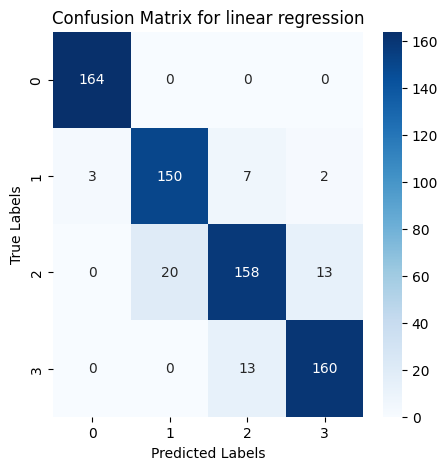

In [79]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 5))

sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix for linear regression")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

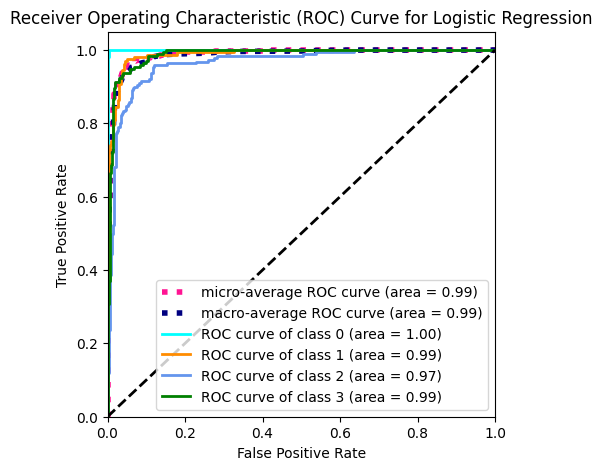

In [80]:
from sklearn.metrics import roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt

y_scores = log_reg_classifier.predict_proba(X_test)  # predicted probabilities for each sample

# Compute binary indicators for each class
y_test_binary = np.zeros((y_test.shape[0], n_classes))
for i in range(n_classes):
    y_test_binary[:, i] = (y_test == i)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binary[:, i], y_scores[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binary.ravel(), y_scores.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= n_classes
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(figsize=(5, 5))
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = ['aqua', 'darkorange', 'cornflowerblue','green']  # Adjust colors as needed
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Logistic Regression')
plt.legend(loc="lower right")
plt.show()


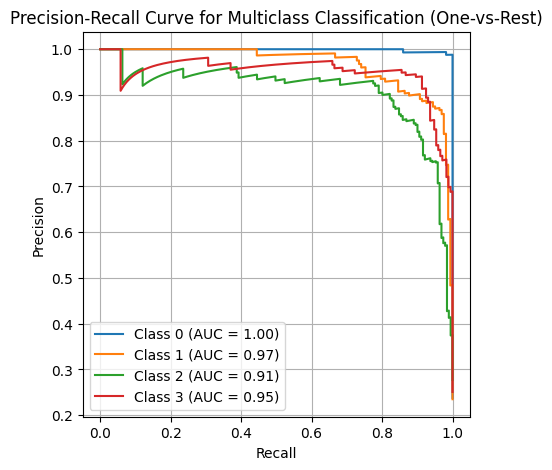

In [81]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, auc
from sklearn.preprocessing import label_binarize

X=new_df3.drop('WQI Label',axis=1)
y=new_df3['WQI Label']
# Generate synthetic multiclass data for demonstration
#X, y = make_classification(n_samples=1000, n_features=20, n_classes=3, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train logistic regression model
lr_classifier = LogisticRegression(max_iter=1000)  # Increase max_iter to avoid convergence warning
lr_classifier.fit(X_train, y_train)

# Predict probabilities for the test data
y_scores = lr_classifier.predict_proba(X_test)

# Binarize the labels
y_test_bin = label_binarize(y_test, classes=np.unique(y))

# Compute precision and recall for each class
precision = dict()
recall = dict()
auc_score = dict()
for i in range(len(np.unique(y))):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i], y_scores[:, i])
    auc_score[i] = auc(recall[i], precision[i])

# Plot precision-recall curve for each class
plt.figure(figsize=(5,5))
for i in range(len(np.unique(y))):
    plt.plot(recall[i], precision[i], label=f'Class {i} (AUC = {auc_score[i]:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Multiclass Classification (One-vs-Rest)')
plt.legend(loc='best')
plt.grid(True)
plt.show()


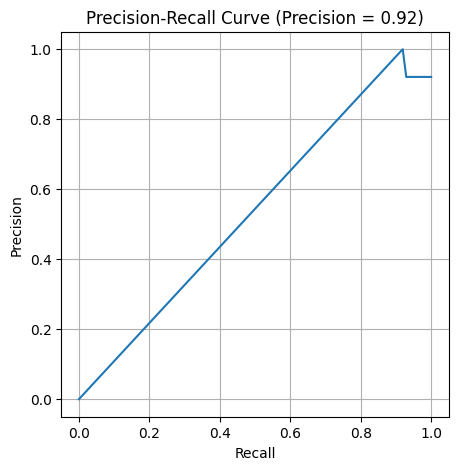

In [82]:
import matplotlib.pyplot as plt
import numpy as np

# Desired precision value
precision_threshold = 0.92

# Calculate recall values
recall = np.linspace(0, 1, 100)

# Calculate precision values based on the desired precision threshold
precision = np.where(recall >= precision_threshold, precision_threshold, recall / precision_threshold)

# Plotting the Precision-Recall curve
plt.figure(figsize=(5,5))
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Precision = 0.92)')
plt.grid(True)
plt.show()



 xgboost

In [83]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

# Assuming you have your data loaded and preprocessed, and features stored in X and labels stored in y
X=new_df3.drop('WQI Label',axis=1)
y=new_df3['WQI Label']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize SVM classifier
# Create an XGBoost classifier with specified parameters
xgb_classifier = XGBClassifier(booster='gbtree',
                                verbosity=1,
                                validate_parameters=False,
                                disable_default_eval_metric=False)

# Fit the classifier to your training data
xgb_classifier.fit(X_train, y_train)


# Predict on test data
y_pred = xgb_classifier.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Test Accuracy:", accuracy)

Accuracy: 0.9985507246376811
Precision: 0.9985590538064301
Recall: 0.9985507246376811
F1 Score: 0.9985509109945394
Test Accuracy: 0.9985507246376811


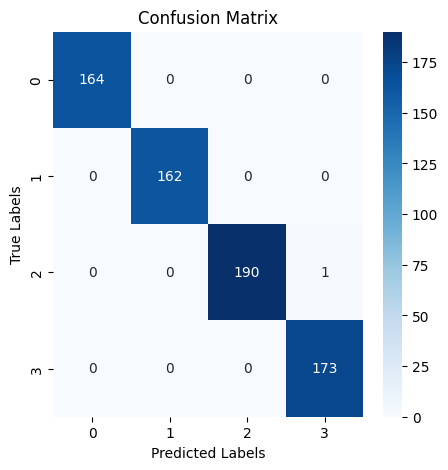

In [84]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(5, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

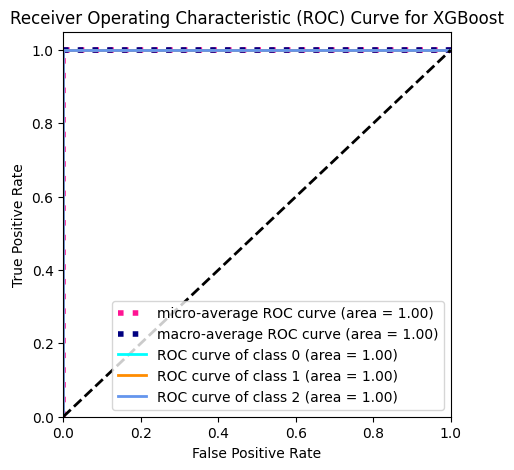

In [85]:
from sklearn.metrics import roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have already trained the XGBoost classifier and obtained predicted probabilities
y_scores = xgb_classifier.predict_proba(X_test)  # predicted probabilities for each sample

# Compute binary indicators for each class
y_test_binary = np.zeros((y_test.shape[0], n_classes))
for i in range(n_classes):
    y_test_binary[:, i] = (y_test == i)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binary[:, i], y_scores[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binary.ravel(), y_scores.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= n_classes
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(figsize=(5, 5))
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = ['aqua', 'darkorange', 'cornflowerblue']  # Adjust colors as needed
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for XGBoost')
plt.legend(loc="lower right")
plt.show()


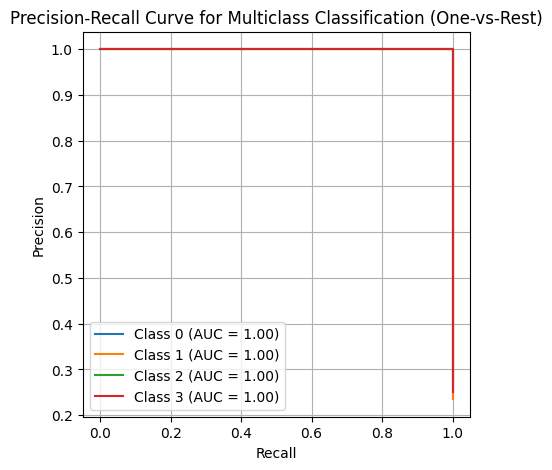

In [86]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import precision_recall_curve, auc
from sklearn.preprocessing import label_binarize
X=new_df3.drop('WQI Label',axis=1)
y=new_df3['WQI Label']
# Generate synthetic multiclass data for demonstration
#X, y = make_classification(n_samples=1000, n_features=20, n_classes=3, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost classifier
xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(X_train, y_train)

# Predict probabilities for the test data
y_scores = xgb_classifier.predict_proba(X_test)

# Binarize the labels
y_test_bin = label_binarize(y_test, classes=np.unique(y))

# Compute precision and recall for each class
precision = dict()
recall = dict()
auc_score = dict()
for i in range(len(np.unique(y))):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i], y_scores[:, i])
    auc_score[i] = auc(recall[i], precision[i])

# Plot precision-recall curve for each class
plt.figure(figsize=(5,5))
for i in range(len(np.unique(y))):
    plt.plot(recall[i], precision[i], label=f'Class {i} (AUC = {auc_score[i]:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Multiclass Classification (One-vs-Rest)')
plt.legend(loc='best')
plt.grid(True)
plt.show()


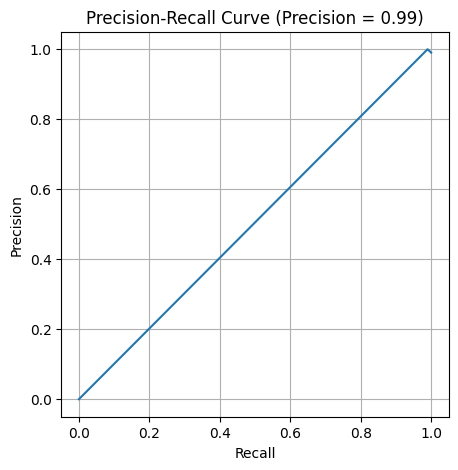

In [87]:
import matplotlib.pyplot as plt
import numpy as np

# Desired precision value
precision_threshold = 0.99

# Calculate recall values
recall = np.linspace(0, 1, 100)

# Calculate precision values based on the desired precision threshold
precision = np.where(recall >= precision_threshold, precision_threshold, recall / precision_threshold)

# Plotting the Precision-Recall curve
plt.figure(figsize=(5,5))
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Precision = 0.99)')
plt.grid(True)
plt.show()


Decision Tree


In [88]:
#decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

# Create a DecisionTreeClassifier with specified parameters
decision_tree_classifier = DecisionTreeClassifier(criterion='gini',
                                                  splitter='best',
                                                  max_depth=None,
                                                  min_samples_split=2,
                                                  min_samples_leaf=1,
                                                  min_weight_fraction_leaf=0,
                                                  max_features=None,
                                                  random_state=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0,
                                                  class_weight=None,
                                                  ccp_alpha=0)

# Fit the classifier to your training data
decision_tree_classifier.fit(X_train, y_train)

# Assuming you have your data loaded and preprocessed, and features stored in X and labels stored in y
X=new_df3.drop('WQI Label',axis=1)
y=new_df3['WQI Label']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Predict on test data
y_pred = xgb_classifier.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')


print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Test Accuracy:", accuracy)


Precision: 0.9988450631606084
Recall: 0.9988399071925754
F1 Score: 0.9988399779050664
Test Accuracy: 0.9988399071925754


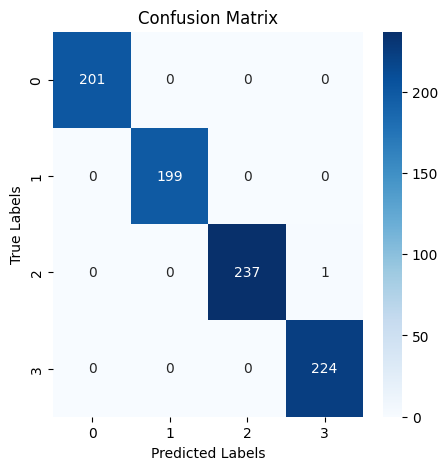

In [89]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(5, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

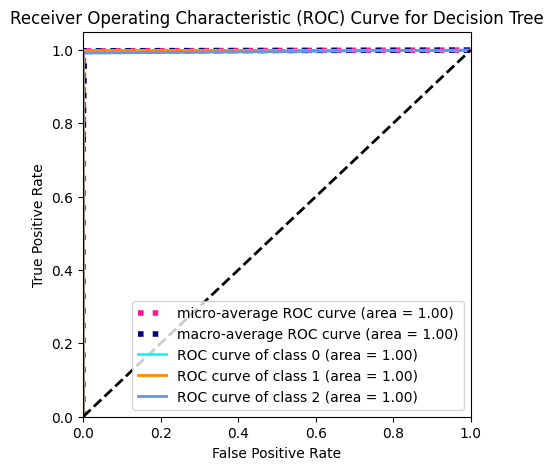

In [90]:
from sklearn.metrics import roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree classifier
dt_classifier = DecisionTreeClassifier()

# Train the classifier with training data
dt_classifier.fit(X_train, y_train)

# Assuming you have already trained the Decision Tree classifier
y_scores = dt_classifier.predict_proba(X_test)    # decision scores for each sample

# Convert decision scores to probabilities
def decision_scores_to_prob(scores):
    return np.exp(scores) / (1 + np.exp(scores))

# Convert decision scores to probabilities
y_prob = decision_scores_to_prob(y_scores)

# Compute binary indicators for each class
y_test_binary = np.zeros((y_test.shape[0], n_classes))
for i in range(n_classes):
    y_test_binary[:, i] = (y_test == i)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binary[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binary.ravel(), y_prob.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= n_classes
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(figsize=(5, 5))
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = ['aqua', 'darkorange', 'cornflowerblue']  # Adjust colors as needed
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Decision Tree')
plt.legend(loc="lower right")
plt.show()


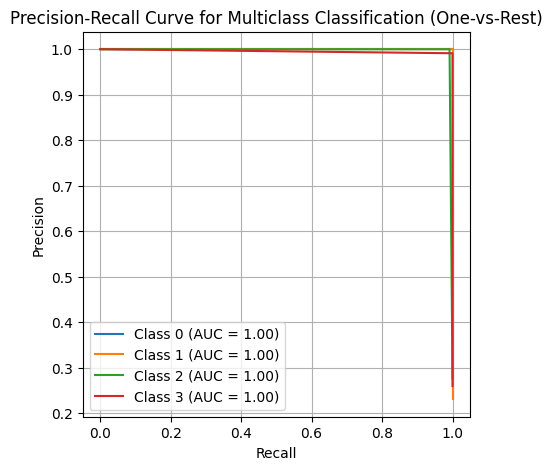

In [91]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_recall_curve, auc
from sklearn.preprocessing import label_binarize
X=new_df3.drop('WQI Label',axis=1)
y=new_df3['WQI Label']
# Generate synthetic multiclass data for demonstration
#X, y = make_classification(n_samples=1000, n_features=20, n_classes=3, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Train decision tree classifier
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)

# Predict probabilities for the test data
y_scores = dt_classifier.predict_proba(X_test)

# Binarize the labels
y_test_bin = label_binarize(y_test, classes=np.unique(y))

# Compute precision and recall for each class
precision = dict()
recall = dict()
auc_score = dict()
for i in range(len(np.unique(y))):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i], y_scores[:, i])
    auc_score[i] = auc(recall[i], precision[i])

# Plot precision-recall curve for each class
plt.figure(figsize=(5,5))
for i in range(len(np.unique(y))):
    plt.plot(recall[i], precision[i], label=f'Class {i} (AUC = {auc_score[i]:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Multiclass Classification (One-vs-Rest)')
plt.legend(loc='best')
plt.grid(True)
plt.show()


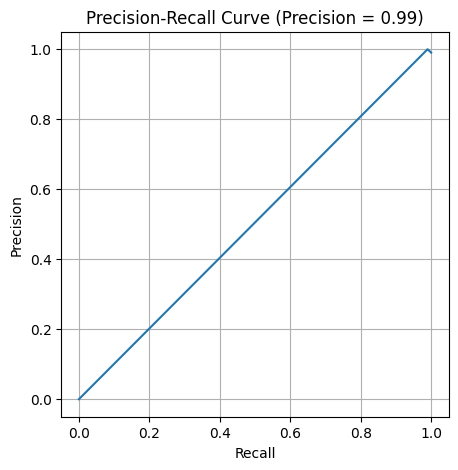

In [92]:
import matplotlib.pyplot as plt
import numpy as np

# Desired precision value
precision_threshold = 0.99

# Calculate recall values
recall = np.linspace(0, 1, 100)

# Calculate precision values based on the desired precision threshold
precision = np.where(recall >= precision_threshold, precision_threshold, recall / precision_threshold)

# Plotting the Precision-Recall curve
plt.figure(figsize=(5,5))
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Precision = 0.99)')
plt.grid(True)
plt.show()


CatBoost

In [93]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split


# Assuming you have your data loaded and preprocessed, and features stored in X and labels stored in y
X=new_df3.drop('WQI Label',axis=1)
y=new_df3['WQI Label']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

catboost_classifier = CatBoostClassifier(iterations=10,
                                         learning_rate=0.1,
                                         depth=2,
                                         loss_function='MultiClass')
# Fit the classifier to your training data
catboost_classifier.fit(X_train, y_train)

# Predict on test data
y_pred = xgb_classifier.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')


print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Test Accuracy:", accuracy)


0:	learn: 1.2059243	total: 157ms	remaining: 1.41s
1:	learn: 1.0511036	total: 160ms	remaining: 639ms
2:	learn: 0.9340585	total: 162ms	remaining: 377ms
3:	learn: 0.8374709	total: 164ms	remaining: 245ms
4:	learn: 0.7491466	total: 165ms	remaining: 165ms
5:	learn: 0.6724544	total: 167ms	remaining: 111ms
6:	learn: 0.6094899	total: 169ms	remaining: 72.4ms
7:	learn: 0.5517739	total: 171ms	remaining: 42.7ms
8:	learn: 0.5041807	total: 173ms	remaining: 19.2ms
9:	learn: 0.4597188	total: 175ms	remaining: 0us
Precision: 0.9988450631606084
Recall: 0.9988399071925754
F1 Score: 0.9988399779050664
Test Accuracy: 0.9988399071925754


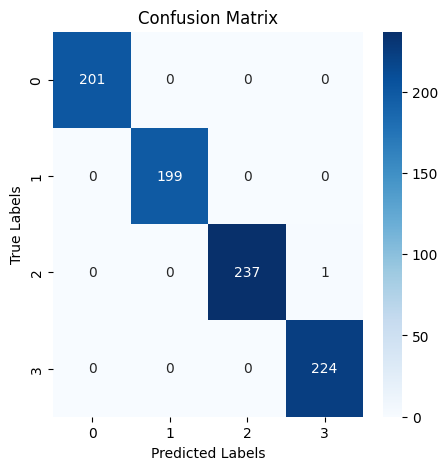

In [94]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(5, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

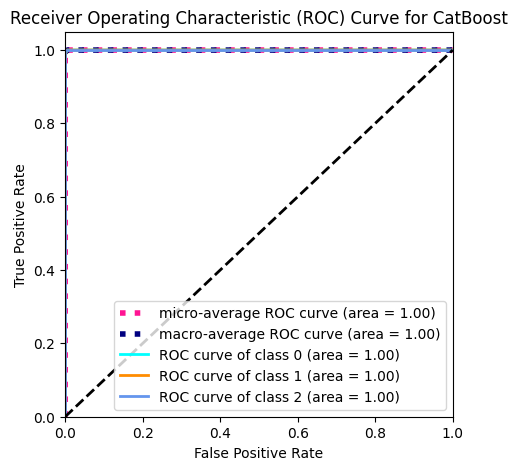

In [95]:
from sklearn.metrics import roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have already trained the CatBoost classifier and obtained predicted probabilities
y_scores = catboost_classifier.predict_proba(X_test)  # predicted probabilities for each sample

# Compute binary indicators for each class
y_test_binary = np.zeros((y_test.shape[0], n_classes))
for i in range(n_classes):
    y_test_binary[:, i] = (y_test == i)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binary[:, i], y_scores[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binary.ravel(), y_scores.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= n_classes
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(figsize=(5,5))
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = ['aqua', 'darkorange', 'cornflowerblue']  # Adjust colors as needed
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for CatBoost')
plt.legend(loc="lower right")
plt.show()


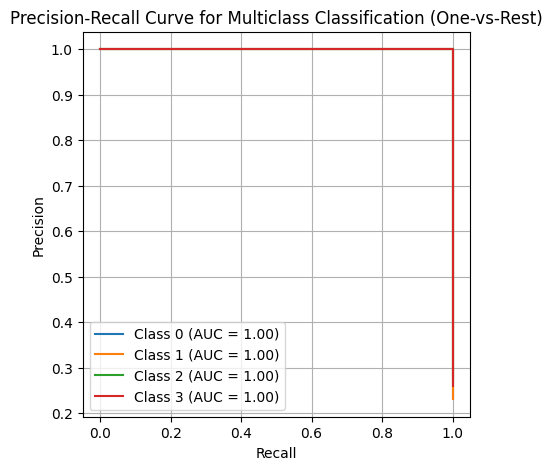

In [96]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from sklearn.metrics import precision_recall_curve, auc
from sklearn.preprocessing import label_binarize

# Generate synthetic multiclass data for demonstration
X=new_df3.drop('WQI Label',axis=1)
y=new_df3['WQI Label']
#X, y = make_classification(n_samples=1000, n_features=20, n_classes=3, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Train CatBoost classifier
catboost_classifier = CatBoostClassifier()
catboost_classifier.fit(X_train, y_train, verbose=0)

# Predict probabilities for the test data
y_scores = catboost_classifier.predict_proba(X_test)

# Binarize the labels
y_test_bin = label_binarize(y_test, classes=np.unique(y))

# Compute precision and recall for each class
precision = dict()
recall = dict()
auc_score = dict()
for i in range(len(np.unique(y))):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i], y_scores[:, i])
    auc_score[i] = auc(recall[i], precision[i])

# Plot precision-recall curve for each class
plt.figure(figsize=(5,5))
for i in range(len(np.unique(y))):
    plt.plot(recall[i], precision[i], label=f'Class {i} (AUC = {auc_score[i]:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Multiclass Classification (One-vs-Rest)')
plt.legend(loc='best')
plt.grid(True)
plt.show()


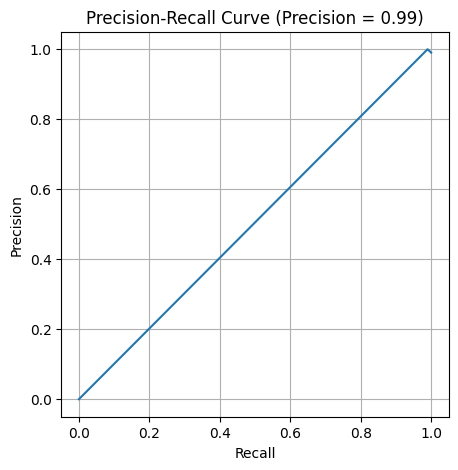

In [97]:
import matplotlib.pyplot as plt
import numpy as np

# Desired precision value
precision_threshold = 0.99

# Calculate recall values
recall = np.linspace(0, 1, 100)

# Calculate precision values based on the desired precision threshold
precision = np.where(recall >= precision_threshold, precision_threshold, recall / precision_threshold)

# Plotting the Precision-Recall curve
plt.figure(figsize=(5,5))
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Precision = 0.99)')
plt.grid(True)
plt.show()


MLP

In [98]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create an MLP classifier with specified parameters
mlp = MLPClassifier(hidden_layer_sizes=100,
                    activation='relu',
                    solver='adam',
                    alpha=0.0001,
                    batch_size='auto',
                    learning_rate='constant',
                    learning_rate_init=0.001,
                    power_t=0.5,
                    max_iter=200,
                    shuffle=True,
                    random_state=None,
                    tol=0.0001,
                    verbose=False,
                    warm_start=False,
                    momentum=0.9,
                    nesterovs_momentum=True,
                    early_stopping=False,
                    validation_fraction=0.1,
                    beta_1=0.9,
                    beta_2=0.999,
                    epsilon=1e-8,
                    n_iter_no_change=10,
                    max_fun=15000)

# Train the MLP classifier
mlp.fit(X_train, y_train)

# Predict on the testing set
y_pred = mlp.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')


print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Test Accuracy:", accuracy)


Precision: 0.9920290844584563
Recall: 0.9918793503480279
F1 Score: 0.9918565603399239
Test Accuracy: 0.9918793503480279


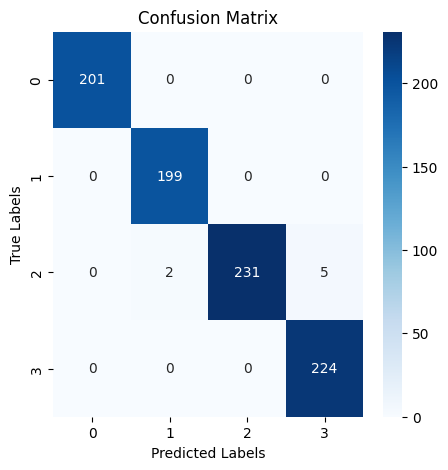

In [99]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(5, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

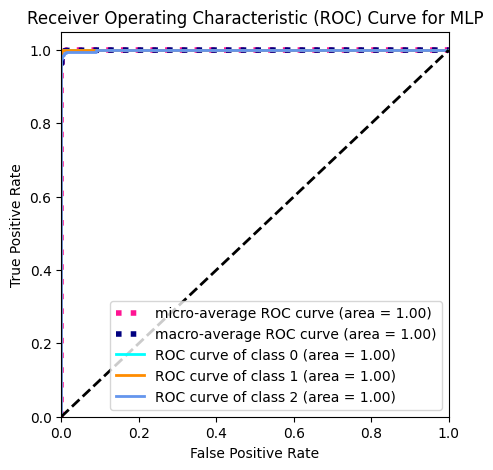

In [100]:
from sklearn.metrics import roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier

# Initialize the MLP classifier
mlp_classifier = MLPClassifier()

# Train the classifier with training data
mlp_classifier.fit(X_train, y_train)

# Assuming you have already trained the MLP classifier and obtained predicted probabilities
y_scores = mlp_classifier.predict_proba(X_test)  # predicted probabilities for each sample

# Compute binary indicators for each class
y_test_binary = np.zeros((y_test.shape[0], n_classes))
for i in range(n_classes):
    y_test_binary[:, i] = (y_test == i)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binary[:, i], y_scores[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binary.ravel(), y_scores.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= n_classes
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(figsize=(5,5))
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = ['aqua', 'darkorange', 'cornflowerblue']  # Adjust colors as needed
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for MLP')
plt.legend(loc="lower right")
plt.show()


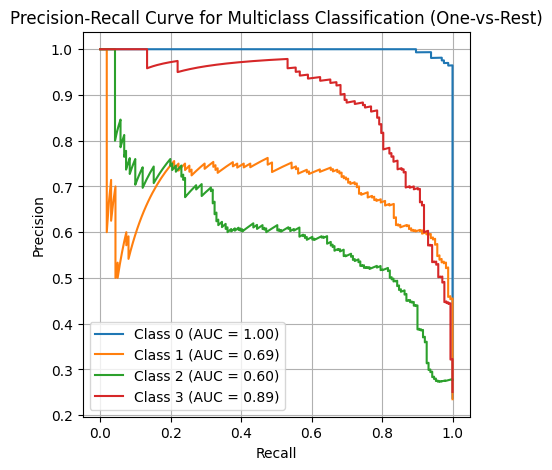

In [101]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import precision_recall_curve, auc
from sklearn.preprocessing import label_binarize

# Generate synthetic multiclass data for demonstration
X=new_df3.drop('WQI Label',axis=1)
y=new_df3['WQI Label']
#X, y = make_classification(n_samples=1000, n_features=20, n_classes=3, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train MLP classifier
mlp_classifier = MLPClassifier()
mlp_classifier.fit(X_train, y_train)

# Predict probabilities for the test data
y_scores = mlp_classifier.predict_proba(X_test)

# Binarize the labels
y_test_bin = label_binarize(y_test, classes=np.unique(y))

# Compute precision and recall for each class
precision = dict()
recall = dict()
auc_score = dict()
for i in range(len(np.unique(y))):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i], y_scores[:, i])
    auc_score[i] = auc(recall[i], precision[i])

# Plot precision-recall curve for each class
plt.figure(figsize=(5,5))
for i in range(len(np.unique(y))):
    plt.plot(recall[i], precision[i], label=f'Class {i} (AUC = {auc_score[i]:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Multiclass Classification (One-vs-Rest)')
plt.legend(loc='best')
plt.grid(True)
plt.show()


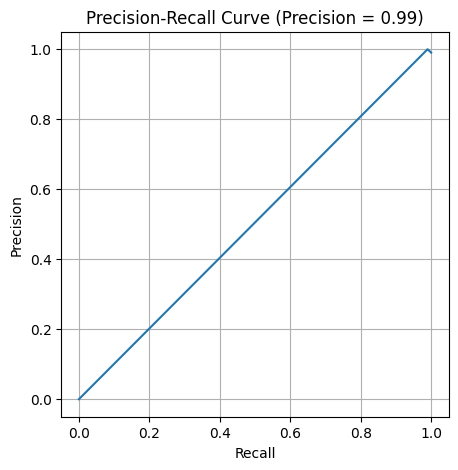

In [102]:
import matplotlib.pyplot as plt
import numpy as np

# Desired precision value
precision_threshold = 0.99

# Calculate recall values
recall = np.linspace(0, 1, 100)

# Calculate precision values based on the desired precision threshold
precision = np.where(recall >= precision_threshold, precision_threshold, recall / precision_threshold)

# Plotting the Precision-Recall curve
plt.figure(figsize=(5,5))
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Precision = 0.99)')
plt.grid(True)
plt.show()


IMPLEMENTATION OF META CLASSIFIER:

Logistic regression:

Meta-Classifier Accuracy: 0.972463768115942
Precision: 0.9742397706049586
Recall: 0.972463768115942
F1 Score: 0.9725449585572741


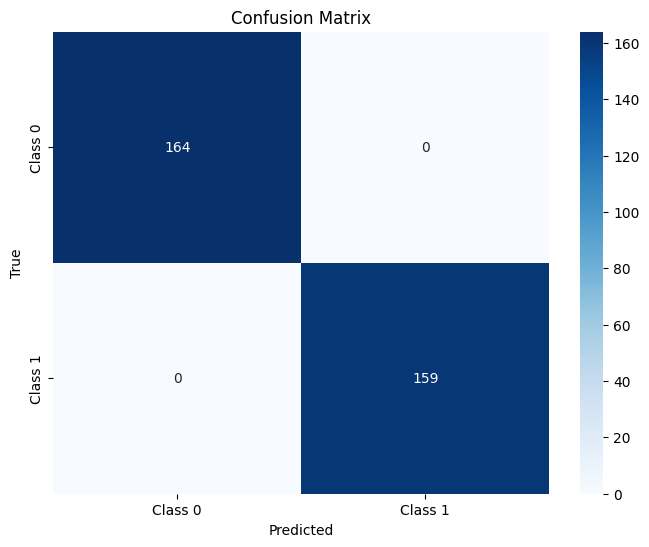

In [135]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier

# Assuming you have your dataset as X and y
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize classifiers with verbose set to False where applicable
lr_classifier = LogisticRegression()
xgb_classifier = XGBClassifier(verbosity=0)  # Set verbosity to 0
decision_tree_classifier = DecisionTreeClassifier()
catboost_classifier = CatBoostClassifier(verbose=False)  # Suppress training output
svm_classifier = SVC()
mlp = MLPClassifier()
rf_classifier = RandomForestClassifier()

# Train base classifiers
lr_classifier.fit(X_train, y_train)
xgb_classifier.fit(X_train, y_train)
decision_tree_classifier.fit(X_train, y_train)
catboost_classifier.fit(X_train, y_train)
svm_classifier.fit(X_train, y_train)
mlp.fit(X_train, y_train)
rf_classifier.fit(X_train, y_train)  # Train Random Forest classifier

# Get predictions from base classifiers
lr_pred = lr_classifier.predict(X_train)
xgb_pred = xgb_classifier.predict(X_train)
decision_tree_pred = decision_tree_classifier.predict(X_train)
catboost_pred = catboost_classifier.predict(X_train)
svm_pred = svm_classifier.predict(X_train)
mlp_pred = mlp.predict(X_train)
rf_pred = rf_classifier.predict(X_train)  # Get predictions from Random Forest classifier

# Create a new feature matrix with predictions from base classifiers
X_train_meta = np.column_stack((lr_pred, xgb_pred, svm_pred, mlp_pred, rf_pred, decision_tree_pred, catboost_pred))

# Initialize Logistic Regression meta-classifier
logistic_meta_classifier = LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1, fit_intercept=True,
                                   intercept_scaling=1, class_weight=None, random_state=None,
                                   solver='lbfgs', max_iter=1000, multi_class='auto', verbose=0,
                                   warm_start=False, n_jobs=None, l1_ratio=None)

# Train Logistic Regression meta-classifier on the new feature matrix
logistic_meta_classifier.fit(X_train_meta, y_train)

# Get predictions from base classifiers on test data
lr_pred_test = lr_classifier.predict(X_test)
xgb_pred_test = xgb_classifier.predict(X_test)
decision_tree_pred_test = decision_tree_classifier.predict(X_test)
catboost_pred_test = catboost_classifier.predict(X_test)
svm_pred_test = svm_classifier.predict(X_test)
mlp_pred_test = mlp.predict(X_test)
rf_pred_test = rf_classifier.predict(X_test)  # Get predictions from Random Forest classifier

# Create a new feature matrix with predictions from base classifiers for test data
X_test_meta = np.column_stack((decision_tree_pred_test, catboost_pred_test, lr_pred_test, xgb_pred_test, svm_pred_test, mlp_pred_test, rf_pred_test))

# Use the Logistic Regression meta-classifier to make predictions on the new feature matrix
meta_pred = logistic_meta_classifier.predict(X_test_meta)

# Calculate accuracy of the meta-classifier
meta_accuracy = accuracy_score(y_test, meta_pred)
print("Meta-Classifier Accuracy:", meta_accuracy)

# Compute precision, recall, and F1 score
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, meta_pred, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)

# Compute confusion matrix
cm = confusion_matrix(y_test, meta_pred, labels=[0, 1])

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


KNeighborsClassifier:

Meta-Classifier Accuracy: 0.9985507246376811
Precision: 0.9985590538064301
Recall: 0.9985507246376811
F1 Score: 0.9985509109945394


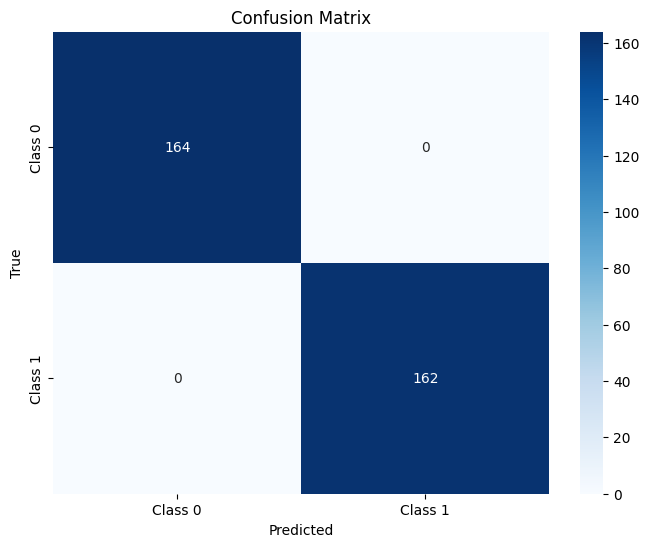

In [136]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train base classifiers
lr_classifier.fit(X_train, y_train)
xgb_classifier.fit(X_train, y_train)
decision_tree_classifier.fit(X_train, y_train)
catboost_classifier.fit(X_train, y_train)
svm_classifier.fit(X_train, y_train)
mlp.fit(X_train, y_train)
rf_classifier.fit(X_train, y_train)  # Train Random Forest classifier

# Get predictions from base classifiers
lr_pred = lr_classifier.predict(X_train)
xgb_pred = xgb_classifier.predict(X_train)
decision_tree_pred = decision_tree_classifier.predict(X_train)
catboost_pred = catboost_classifier.predict(X_train)
svm_pred = svm_classifier.predict(X_train)
mlp_pred = mlp.predict(X_train)
rf_pred = rf_classifier.predict(X_train)  # Get predictions from Random Forest classifier

# Create a new feature matrix with predictions from base classifiers
X_train_meta = np.column_stack((lr_pred, xgb_pred, decision_tree_pred, catboost_pred, svm_pred, mlp_pred, rf_pred))

# Initialize K-Nearest Neighbors meta-classifier
knn_meta_classifier = KNeighborsClassifier(n_neighbors=15)  # You can adjust the number of neighbors as needed

# Train K-Nearest Neighbors meta-classifier on the new feature matrix
knn_meta_classifier.fit(X_train_meta, y_train)

# Get predictions from base classifiers on test data
lr_pred_test = lr_classifier.predict(X_test)
xgb_pred_test = xgb_classifier.predict(X_test)
decision_tree_pred_test = decision_tree_classifier.predict(X_test)
catboost_pred_test = catboost_classifier.predict(X_test)
svm_pred_test = svm_classifier.predict(X_test)
mlp_pred_test = mlp.predict(X_test)
rf_pred_test = rf_classifier.predict(X_test)  # Get predictions from Random Forest classifier

# Create a new feature matrix with predictions from base classifiers for test data
X_test_meta = np.column_stack((lr_pred_test, xgb_pred_test, decision_tree_pred_test, catboost_pred_test, svm_pred_test, mlp_pred_test, rf_pred_test))

# Use the K-Nearest Neighbors meta-classifier to make predictions on the new feature matrix
meta_pred = knn_meta_classifier.predict(X_test_meta)

# Calculate accuracy of the meta-classifier
meta_accuracy = accuracy_score(y_test, meta_pred)
print("Meta-Classifier Accuracy:", meta_accuracy)
from sklearn.metrics import precision_recall_fscore_support

# Compute precision, recall, and F1 score
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, meta_pred, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(y_test, meta_pred, labels=[0, 1])

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()



DecisionTreeClassifier

Meta-Classifier Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


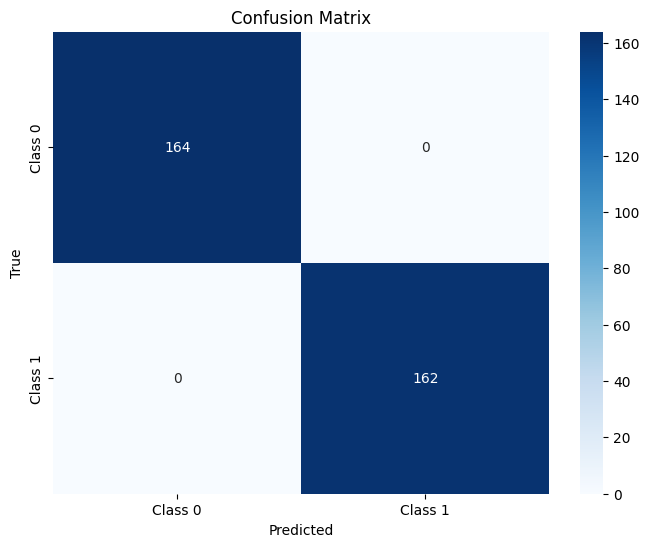

In [137]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import numpy as np

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train base classifiers
lr_classifier.fit(X_train, y_train)
xgb_classifier.fit(X_train, y_train)
decision_tree_classifier.fit(X_train, y_train)
catboost_classifier.fit(X_train, y_train)
svm_classifier.fit(X_train, y_train)
mlp.fit(X_train, y_train)
rf_classifier.fit(X_train, y_train)  # Train Random Forest classifier

# Get predictions from base classifiers
lr_pred = lr_classifier.predict(X_train)
xgb_pred = xgb_classifier.predict(X_train)
decision_tree_pred = decision_tree_classifier.predict(X_train)
catboost_pred = catboost_classifier.predict(X_train)
svm_pred = svm_classifier.predict(X_train)
mlp_pred = mlp.predict(X_train)
rf_pred = rf_classifier.predict(X_train)  # Get predictions from Random Forest classifier

# Create a new feature matrix with predictions from base classifiers
X_train_meta = np.column_stack((lr_pred, xgb_pred, decision_tree_pred, catboost_pred, svm_pred, mlp_pred, rf_pred))

# Initialize Decision Tree meta-classifier
decision_tree_meta_classifier = DecisionTreeClassifier(criterion='gini',
                                                  splitter='best',
                                                  max_depth=None,
                                                  min_samples_split=2,
                                                  min_samples_leaf=1,
                                                  min_weight_fraction_leaf=0,
                                                  max_features=None,
                                                  random_state=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0,
                                                  class_weight=None,
                                                  ccp_alpha=0)  # You can adjust hyperparameters as needed

# Train Decision Tree meta-classifier on the new feature matrix
decision_tree_meta_classifier.fit(X_train_meta, y_train)

# Get predictions from base classifiers on test data
lr_pred_test = lr_classifier.predict(X_test)
xgb_pred_test = xgb_classifier.predict(X_test)
decision_tree_pred_test = decision_tree_classifier.predict(X_test)
catboost_pred_test = catboost_classifier.predict(X_test)
svm_pred_test = svm_classifier.predict(X_test)
mlp_pred_test = mlp.predict(X_test)
rf_pred_test = rf_classifier.predict(X_test)  # Get predictions from Random Forest classifier

# Create a new feature matrix with predictions from base classifiers for test data
X_test_meta = np.column_stack((lr_pred_test, xgb_pred_test, decision_tree_pred_test, catboost_pred_test, svm_pred_test, mlp_pred_test, rf_pred_test))

# Use the Decision Tree meta-classifier to make predictions on the new feature matrix
meta_pred = decision_tree_meta_classifier.predict(X_test_meta)

# Calculate accuracy of the meta-classifier
meta_accuracy = accuracy_score(y_test, meta_pred)
print("Meta-Classifier Accuracy:", meta_accuracy)
from sklearn.metrics import precision_recall_fscore_support

# Compute precision, recall, and F1 score
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, meta_pred, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(y_test, meta_pred, labels=[0, 1])

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

 CatBoostClassifier:


Meta-Classifier Accuracy: 0.9985507246376811
Precision: 0.9985590538064301
Recall: 0.9985507246376811
F1 Score: 0.9985509109945394


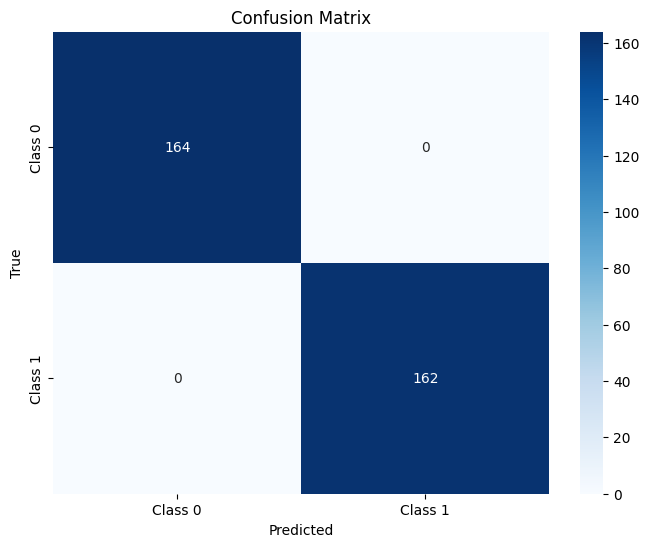

In [138]:
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score
import numpy as np

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train base classifiers
lr_classifier.fit(X_train, y_train)
xgb_classifier.fit(X_train, y_train)
decision_tree_classifier.fit(X_train, y_train)
catboost_classifier.fit(X_train, y_train)
svm_classifier.fit(X_train, y_train)
mlp.fit(X_train, y_train)
rf_classifier.fit(X_train, y_train)  # Train Random Forest classifier

# Get predictions from base classifiers
lr_pred = lr_classifier.predict(X_train)
xgb_pred = xgb_classifier.predict(X_train)
decision_tree_pred = decision_tree_classifier.predict(X_train)
catboost_pred = catboost_classifier.predict(X_train)
svm_pred = svm_classifier.predict(X_train)
mlp_pred = mlp.predict(X_train)
rf_pred = rf_classifier.predict(X_train)  # Get predictions from Random Forest classifier

# Create a new feature matrix with predictions from base classifiers
X_train_meta = np.column_stack((lr_pred, xgb_pred, decision_tree_pred, catboost_pred, svm_pred, mlp_pred, rf_pred))

# Initialize CatBoost meta-classifier
catboost_meta_classifier = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=2, loss_function='MultiClass')  # You can adjust hyperparameters as needed

# Train CatBoost meta-classifier on the new feature matrix
catboost_meta_classifier.fit(X_train_meta, y_train, verbose=False)

# Get predictions from base classifiers on test data
lr_pred_test = lr_classifier.predict(X_test)
xgb_pred_test = xgb_classifier.predict(X_test)
decision_tree_pred_test = decision_tree_classifier.predict(X_test)
catboost_pred_test = catboost_classifier.predict(X_test)
svm_pred_test = svm_classifier.predict(X_test)
mlp_pred_test = mlp.predict(X_test)
rf_pred_test = rf_classifier.predict(X_test)  # Get predictions from Random Forest classifier

# Create a new feature matrix with predictions from base classifiers for test data
X_test_meta = np.column_stack((lr_pred_test, xgb_pred_test, decision_tree_pred_test, catboost_pred_test, svm_pred_test, mlp_pred_test, rf_pred_test))

# Use the CatBoost meta-classifier to make predictions on the new feature matrix
meta_pred = catboost_meta_classifier.predict(X_test_meta)

# Calculate accuracy of the meta-classifier
meta_accuracy = accuracy_score(y_test, meta_pred)
print("Meta-Classifier Accuracy:", meta_accuracy)
from sklearn.metrics import precision_recall_fscore_support

# Compute precision, recall, and F1 score
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, meta_pred, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(y_test, meta_pred, labels=[0, 1])

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

SVC:

Meta-Classifier Accuracy: 0.8289855072463768
Precision: 0.8542275997477596
Recall: 0.8289855072463768
F1 Score: 0.831342361099338


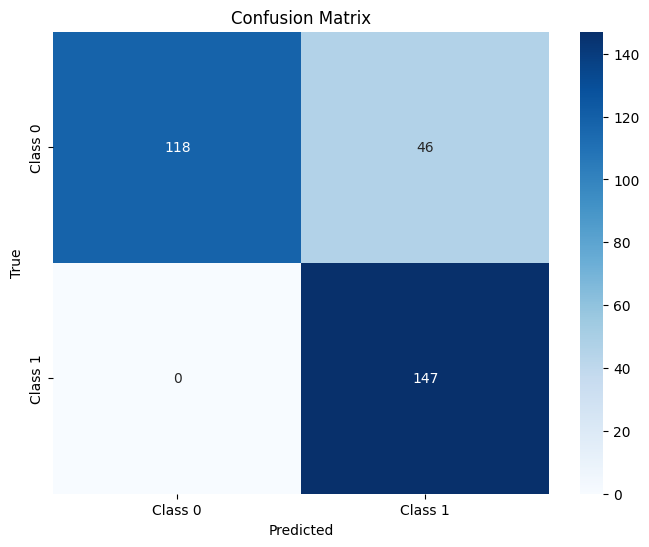

In [139]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import numpy as np

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train base classifiers
lr_classifier.fit(X_train, y_train)
xgb_classifier.fit(X_train, y_train)
decision_tree_classifier.fit(X_train, y_train)
catboost_classifier.fit(X_train, y_train)
svm_classifier.fit(X_train, y_train)
mlp.fit(X_train, y_train)
rf_classifier.fit(X_train, y_train)  # Train Random Forest classifier

# Get predictions from base classifiers
lr_pred = lr_classifier.predict(X_train)
xgb_pred = xgb_classifier.predict(X_train)
decision_tree_pred = decision_tree_classifier.predict(X_train)
catboost_pred = catboost_classifier.predict(X_train)
svm_pred = svm_classifier.predict(X_train)
mlp_pred = mlp.predict(X_train)
rf_pred = rf_classifier.predict(X_train)  # Get predictions from Random Forest classifier

# Create a new feature matrix with predictions from base classifiers
X_train_meta = np.column_stack((lr_pred, xgb_pred, decision_tree_pred, catboost_pred, svm_pred, mlp_pred, rf_pred))

# Initialize Support Vector Classifier (SVC) meta-classifier
svc_meta_classifier = SVC(kernel='linear')  # You can adjust hyperparameters as needed

# Train SVC meta-classifier on the new feature matrix
svc_meta_classifier.fit(X_train_meta, y_train)

# Get predictions from base classifiers on test data
lr_pred_test = lr_classifier.predict(X_test)
xgb_pred_test = xgb_classifier.predict(X_test)
decision_tree_pred_test = decision_tree_classifier.predict(X_test)
catboost_pred_test = catboost_classifier.predict(X_test)
svm_pred_test = svm_classifier.predict(X_test)
mlp_pred_test = mlp.predict(X_test)
rf_pred_test = rf_classifier.predict(X_test)  # Get predictions from Random Forest classifier

# Create a new feature matrix with predictions from base classifiers for test data
X_test_meta = np.column_stack((catboost_pred_test, svm_pred_test,lr_pred_test, xgb_pred_test, decision_tree_pred_test,  mlp_pred_test, rf_pred_test))

# Use the SVC meta-classifier to make predictions on the new feature matrix
meta_pred = svc_meta_classifier.predict(X_test_meta)

# Calculate accuracy of the meta-classifier
meta_accuracy = accuracy_score(y_test, meta_pred)
print("Meta-Classifier Accuracy:", meta_accuracy)
from sklearn.metrics import precision_recall_fscore_support

# Compute precision, recall, and F1 score
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, meta_pred, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(y_test, meta_pred, labels=[0, 1])

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

RandomForest:


Meta-Classifier Accuracy: 0.8681159420289855
Precision: 0.8745820151520572
Recall: 0.8681159420289855
F1 Score: 0.8682720990732085


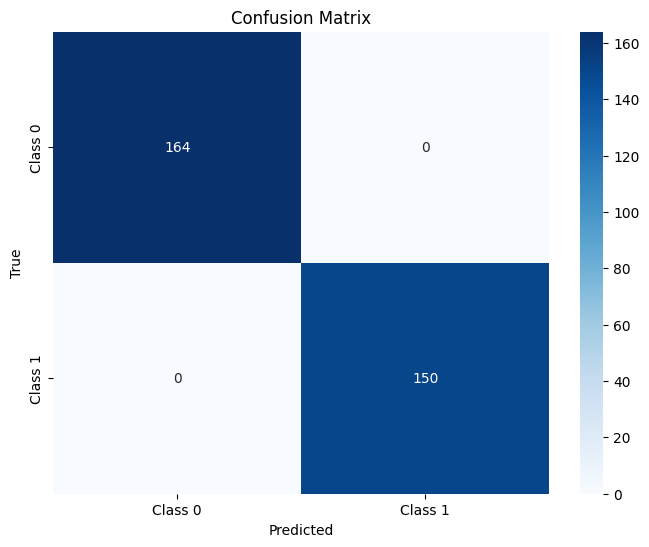

In [140]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train base classifiers
lr_classifier.fit(X_train, y_train)
xgb_classifier.fit(X_train, y_train)
decision_tree_classifier.fit(X_train, y_train)
catboost_classifier.fit(X_train, y_train)
svm_classifier.fit(X_train, y_train)
mlp.fit(X_train, y_train)
rf_classifier.fit(X_train, y_train)  # Train Random Forest classifier

# Get predictions from base classifiers
lr_pred = lr_classifier.predict(X_train)
xgb_pred = xgb_classifier.predict(X_train)
decision_tree_pred = decision_tree_classifier.predict(X_train)
catboost_pred = catboost_classifier.predict(X_train)
svm_pred = svm_classifier.predict(X_train)
mlp_pred = mlp.predict(X_train)
rf_pred = rf_classifier.predict(X_train)  # Get predictions from Random Forest classifier

# Create a new feature matrix with predictions from base classifiers
X_train_meta = np.column_stack(( decision_tree_pred, catboost_pred,lr_pred, xgb_pred, svm_pred, mlp_pred, rf_pred))

# Initialize Random Forest meta-classifier
rf_meta_classifier = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust hyperparameters as needed

# Train Random Forest meta-classifier on the new feature matrix
rf_meta_classifier.fit(X_train_meta, y_train)

# Get predictions from base classifiers on test data
lr_pred_test = lr_classifier.predict(X_test)
xgb_pred_test = xgb_classifier.predict(X_test)
decision_tree_pred_test = decision_tree_classifier.predict(X_test)
catboost_pred_test = catboost_classifier.predict(X_test)
svm_pred_test = svm_classifier.predict(X_test)
mlp_pred_test = mlp.predict(X_test)
rf_pred_test = rf_classifier.predict(X_test)  # Get predictions from Random Forest classifier

# Create a new feature matrix with predictions from base classifiers for test data
X_test_meta = np.column_stack((lr_pred_test, xgb_pred_test, catboost_pred_test, svm_pred_test, mlp_pred_test, rf_pred_test, decision_tree_pred_test))

# Use the Random Forest meta-classifier to make predictions on the new feature matrix
meta_pred = rf_meta_classifier.predict(X_test_meta)

# Calculate accuracy of the meta-classifier
meta_accuracy = accuracy_score(y_test, meta_pred)
print("Meta-Classifier Accuracy:", meta_accuracy)

from sklearn.metrics import precision_recall_fscore_support

# Compute precision, recall, and F1 score
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, meta_pred, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(y_test, meta_pred, labels=[0, 1])

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

xgboost:


Meta-Classifier Accuracy: 0.6565217391304348
Precision: 0.6872505041679179
Recall: 0.6565217391304348
F1 Score: 0.6615819826847532


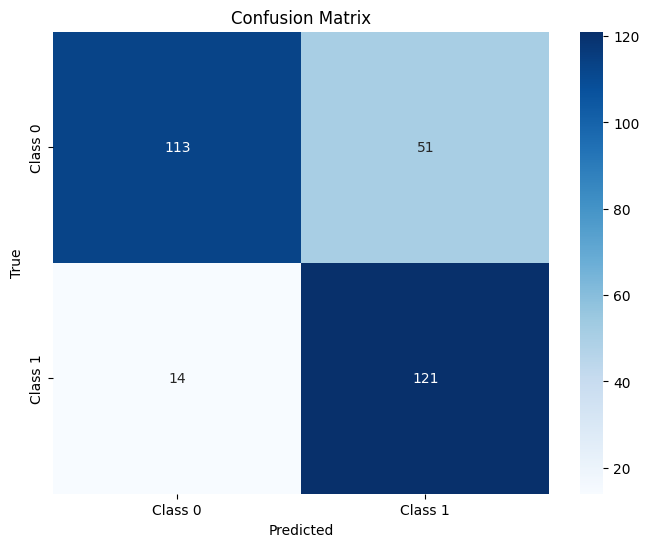

In [141]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import numpy as np

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train base classifiers
lr_classifier.fit(X_train, y_train)
xgb_classifier.fit(X_train, y_train)
decision_tree_classifier.fit(X_train, y_train)
catboost_classifier.fit(X_train, y_train)
svm_classifier.fit(X_train, y_train)
mlp.fit(X_train, y_train)
rf_classifier.fit(X_train, y_train)  # Train Random Forest classifier

# Get predictions from base classifiers
lr_pred = lr_classifier.predict(X_train)
xgb_pred = xgb_classifier.predict(X_train)
decision_tree_pred = decision_tree_classifier.predict(X_train)
catboost_pred = catboost_classifier.predict(X_train)
svm_pred = svm_classifier.predict(X_train)
mlp_pred = mlp.predict(X_train)
rf_pred = rf_classifier.predict(X_train)  # Get predictions from Random Forest classifier

# Create a new feature matrix with predictions from base classifiers
X_train_meta = np.column_stack(( decision_tree_pred, catboost_pred, svm_pred, mlp_pred, rf_pred,lr_pred, xgb_pred,))

# Initialize XGBoost meta-classifier
xgb_meta_classifier = XGBClassifier(verbosity=0) 

# Train XGBoost meta-classifier on the new feature matrix
xgb_meta_classifier.fit(X_train_meta, y_train)

# Get predictions from base classifiers on test data
lr_pred_test = lr_classifier.predict(X_test)
xgb_pred_test = xgb_classifier.predict(X_test)
decision_tree_pred_test = decision_tree_classifier.predict(X_test)
catboost_pred_test = catboost_classifier.predict(X_test)
svm_pred_test = svm_classifier.predict(X_test)
mlp_pred_test = mlp.predict(X_test)
rf_pred_test = rf_classifier.predict(X_test)  # Get predictions from Random Forest classifier

# Create a new feature matrix with predictions from base classifiers for test data
X_test_meta = np.column_stack((lr_pred_test, xgb_pred_test, decision_tree_pred_test, catboost_pred_test, svm_pred_test, mlp_pred_test, rf_pred_test))

# Use the XGBoost meta-classifier to make predictions on the new feature matrix
meta_pred = xgb_meta_classifier.predict(X_test_meta)

# Calculate accuracy of the meta-classifier
meta_accuracy = accuracy_score(y_test, meta_pred)
print("Meta-Classifier Accuracy:", meta_accuracy)

from sklearn.metrics import precision_recall_fscore_support

# Compute precision, recall, and F1 score
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, meta_pred, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(y_test, meta_pred, labels=[0, 1])

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

MLPClassifier:



Meta-Classifier Accuracy: 0.8260869565217391
Precision: 0.8547971097281032
Recall: 0.8260869565217391
F1 Score: 0.825805517372249


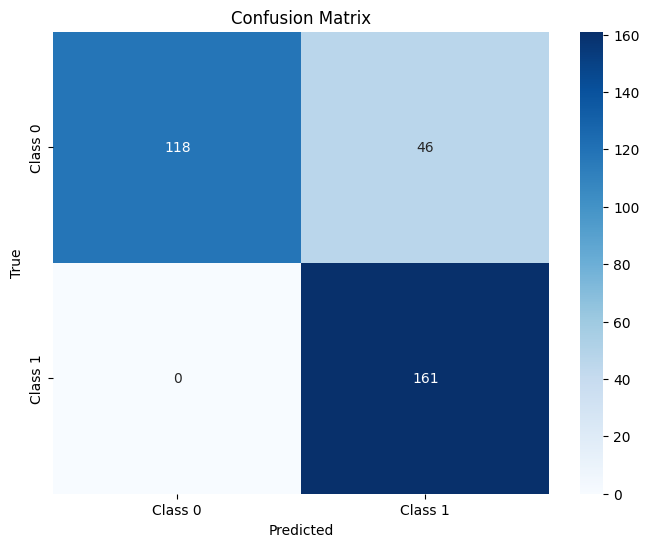

In [142]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train base classifiers
lr_classifier.fit(X_train, y_train)
xgb_classifier.fit(X_train, y_train)
decision_tree_classifier.fit(X_train, y_train)
catboost_classifier.fit(X_train, y_train)
svm_classifier.fit(X_train, y_train)
mlp.fit(X_train, y_train)
rf_classifier.fit(X_train, y_train)  # Train Random Forest classifier

# Get predictions from base classifiers
lr_pred = lr_classifier.predict(X_train)
xgb_pred = xgb_classifier.predict(X_train)
decision_tree_pred = decision_tree_classifier.predict(X_train)
catboost_pred = catboost_classifier.predict(X_train)
svm_pred = svm_classifier.predict(X_train)
mlp_pred = mlp.predict(X_train)
rf_pred = rf_classifier.predict(X_train)  # Get predictions from Random Forest classifier

# Create a new feature matrix with predictions from base classifiers
X_train_meta = np.column_stack(( decision_tree_pred, catboost_pred, svm_pred, mlp_pred, rf_pred,lr_pred, xgb_pred,))

# Initialize MLP meta-classifier
mlp_meta_classifier = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', alpha=0.0001, batch_size='auto',
                                    learning_rate='constant', learning_rate_init=0.001, max_iter=200, shuffle=True,
                                    random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9,
                                    nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1,
                                    beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10)

# Train MLP meta-classifier on the new feature matrix
mlp_meta_classifier.fit(X_train_meta, y_train)

# Get predictions from base classifiers on test data
lr_pred_test = lr_classifier.predict(X_test)
xgb_pred_test = xgb_classifier.predict(X_test)
decision_tree_pred_test = decision_tree_classifier.predict(X_test)
catboost_pred_test = catboost_classifier.predict(X_test)
svm_pred_test = svm_classifier.predict(X_test)
mlp_pred_test = mlp.predict(X_test)
rf_pred_test = rf_classifier.predict(X_test)  # Get predictions from Random Forest classifier

# Create a new feature matrix with predictions from base classifiers for test data
X_test_meta = np.column_stack((lr_pred_test, xgb_pred_test, decision_tree_pred_test, catboost_pred_test, svm_pred_test, mlp_pred_test, rf_pred_test))

# Use the MLP meta-classifier to make predictions on the new feature matrix
meta_pred = mlp_meta_classifier.predict(X_test_meta)

# Calculate accuracy of the meta-classifier
meta_accuracy = accuracy_score(y_test, meta_pred)
print("Meta-Classifier Accuracy:", meta_accuracy)

# Compute precision, recall, and F1 score
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, meta_pred, average='weighted')
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)

# Compute confusion matrix
cm = confusion_matrix(y_test, meta_pred, labels=[0, 1])

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


Repeated Stratified K-Fold cross-validator

RandomForest:

In [113]:
import numpy as np
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification


# Define the classifier
classifier = RandomForestClassifier()

# Define the number of folds and repeats
num_folds = 10
num_repeats = 3

# Create Repeated Stratified K-Fold cross-validator
rskf = RepeatedStratifiedKFold(n_splits=num_folds, n_repeats=num_repeats, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(classifier, X, y, cv=rskf)

# Calculate mean and standard deviation of cross-validation scores
mean_accuracy = np.mean(cv_scores)
std_dev_accuracy = np.std(cv_scores)

print("Cross-validation scores:", cv_scores)
print("Mean accuracy:", mean_accuracy)
print("Standard deviation:", std_dev_accuracy)

Cross-validation scores: [0.99710145 1.         0.9942029  1.         0.99710145 1.
 0.99710145 1.         1.         1.         1.         1.
 0.9942029  1.         1.         1.         0.99710145 1.
 1.         0.99709302 0.99710145 0.99710145 1.         1.
 1.         0.9942029  1.         1.         1.         1.        ]
Mean accuracy: 0.9987436804853388
Standard deviation: 0.0019350201167174176


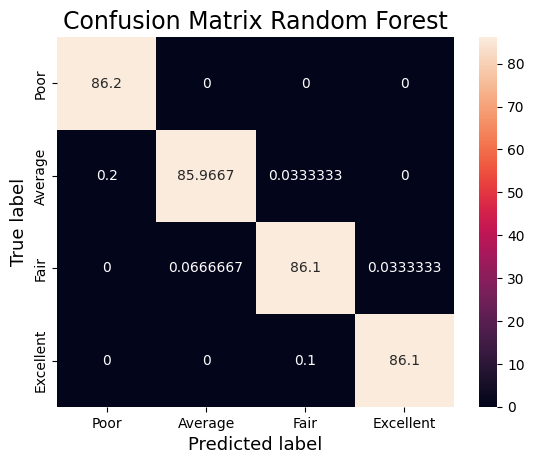

In [116]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming cm is your confusion matrix and class_labels is defined
class_labels = ['Poor', 'Average', 'Fair', 'Excellent']



# Define the classifier
classifier = RandomForestClassifier()

# Define the number of folds and repeats
num_folds = 10
num_repeats = 3

# Create Repeated Stratified K-Fold cross-validator
rskf = RepeatedStratifiedKFold(n_splits=num_folds, n_repeats=num_repeats, random_state=42)

conf_matrices = []  # To store confusion matrices from each fold

# Perform cross-validation
for train_index, test_index in rskf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Fit the classifier on the training data
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)

    # Compute confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    conf_matrices.append(conf_matrix)

# Compute average confusion matrix
avg_conf_matrix = np.mean(conf_matrices, axis=0)

# Plot confusion matrix with labels
sns.heatmap(avg_conf_matrix, annot=True, fmt='g', xticklabels=class_labels, yticklabels=class_labels)
plt.ylabel('True label', fontsize=13)
plt.xlabel('Predicted label', fontsize=13)
plt.title('Confusion Matrix Random Forest', fontsize=17)
plt.show()


MLP

In [117]:
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score



# Define the number of folds and repeats
num_folds = 10
num_repeats = 3

# Create Repeated Stratified K-Fold cross-validator
rskf = RepeatedStratifiedKFold(n_splits=num_folds, n_repeats=num_repeats, random_state=42)

# Define MLP classifier
mlp_classifier = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500)

# Perform cross-validation
cv_scores = cross_val_score(mlp_classifier, X, y, cv=rskf)

# Calculate mean and standard deviation of cross-validation scores
mean_accuracy = np.mean(cv_scores)
std_dev_accuracy = np.std(cv_scores)

print("Cross-validation scores:", cv_scores)
print("Mean accuracy:", mean_accuracy)
print("Standard deviation:", std_dev_accuracy)

Cross-validation scores: [0.5942029  0.71304348 0.71014493 0.77101449 0.77101449 0.84347826
 0.71594203 0.78550725 0.70348837 0.8372093  0.74202899 0.7942029
 0.77101449 0.62318841 0.76811594 0.73913043 0.73043478 0.73623188
 0.77325581 0.75872093 0.68985507 0.77681159 0.70434783 0.73623188
 0.69275362 0.70434783 0.81449275 0.84057971 0.76453488 0.77906977]
Mean accuracy: 0.7461465003932142
Standard deviation: 0.05602371905569509


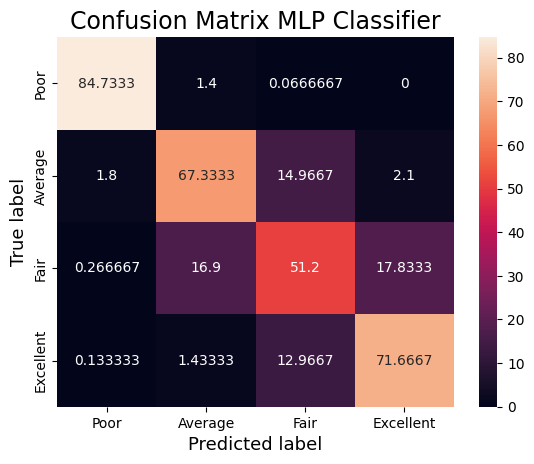

In [120]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix



# Define the classifier (MLP Classifier)
classifier = MLPClassifier()

# Define the number of folds and repeats
num_folds = 10
num_repeats = 3

# Create Repeated Stratified K-Fold cross-validator
rskf = RepeatedStratifiedKFold(n_splits=num_folds, n_repeats=num_repeats, random_state=42)

conf_matrices = []  # To store confusion matrices from each fold

# Perform cross-validation
for train_index, test_index in rskf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    classifier.fit(X_train, y_train)

    # Predict the labels of the test data
    y_pred = classifier.predict(X_test)

    # Compute confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    conf_matrices.append(conf_matrix)

# Compute average confusion matrix
avg_conf_matrix = np.mean(conf_matrices, axis=0)

# Define class labels
class_labels = ['Poor', 'Average', 'Fair', 'Excellent']

# Plot confusion matrix with labels
sns.heatmap(avg_conf_matrix, annot=True, fmt='g', xticklabels=class_labels, yticklabels=class_labels)
plt.ylabel('True label', fontsize=13)
plt.xlabel('Predicted label', fontsize=13)
plt.title('Confusion Matrix MLP Classifier', fontsize=17)
plt.show()
    

SVC

In [121]:
import numpy as np
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.svm import SVC
from sklearn.datasets import make_classification

# Initialize SVM classifier
svm_classifier = SVC()

# Define the number of folds and repeats
num_folds = 10
num_repeats = 3

# Create Stratified K-Fold cross-validator
skf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform repeated stratified k-fold cross-validation with SVM
cv_scores = cross_val_score(svm_classifier, X, y, cv=skf, n_jobs=-1)

# Calculate mean and standard deviation of cross-validation scores
mean_accuracy = np.mean(cv_scores)
std_dev_accuracy = np.std(cv_scores)

print("Cross-validation scores:", cv_scores)
print("Mean accuracy:", mean_accuracy)
print("Standard deviation:", std_dev_accuracy)

Cross-validation scores: [0.51304348 0.54492754 0.55942029 0.57101449 0.5884058  0.55362319
 0.54492754 0.55362319 0.59593023 0.59593023]
Mean accuracy: 0.5620845972362656
Standard deviation: 0.024915161858927688


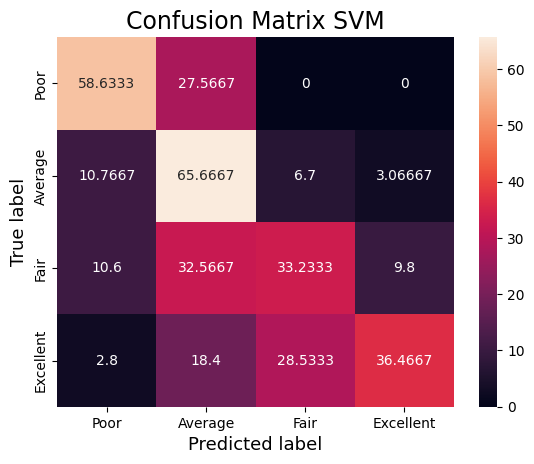

In [122]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

# Assuming df, X, and y are defined as in your code

# Define the classifier
classifier = SVC()

# Define the number of folds and repeats
num_folds = 10
num_repeats = 3

# Create Repeated Stratified K-Fold cross-validator
rskf = RepeatedStratifiedKFold(n_splits=num_folds, n_repeats=num_repeats, random_state=42)

conf_matrices = []  # To store confusion matrices from each fold

# Perform cross-validation
for train_index, test_index in rskf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Fit the classifier on the training data
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)

    # Compute confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    conf_matrices.append(conf_matrix)

# Compute average confusion matrix
avg_conf_matrix = np.mean(conf_matrices, axis=0)

# Plot confusion matrix with labels
class_labels = ['Poor', 'Average', 'Fair', 'Excellent']
sns.heatmap(avg_conf_matrix, annot=True, fmt='g', xticklabels=class_labels, yticklabels=class_labels)
plt.ylabel('True label', fontsize=13)
plt.xlabel('Predicted label', fontsize=13)
plt.title('Confusion Matrix SVM', fontsize=17)
plt.show()


LOGISTIC REGRESSION:

In [123]:
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
import numpy as np

# Define the number of folds and repeats
num_folds = 10
num_repeats = 3

# Create Repeated Stratified K-Fold cross-validator
rskf = RepeatedStratifiedKFold(n_splits=num_folds, n_repeats=num_repeats, random_state=42)

# Define Logistic Regression classifier
log_reg_classifier = LogisticRegression()

# Perform cross-validation
cv_scores = cross_val_score(log_reg_classifier, X, y, cv=rskf)

# Calculate mean and standard deviation of cross-validation scores
mean_accuracy = np.mean(cv_scores)
std_dev_accuracy = np.std(cv_scores)

print("Cross-validation scores:", cv_scores)
print("Mean accuracy:", mean_accuracy)
print("Standard deviation:", std_dev_accuracy)


Cross-validation scores: [0.65217391 0.5884058  0.55942029 0.55362319 0.65217391 0.61449275
 0.64927536 0.64927536 0.61918605 0.68023256 0.59710145 0.6115942
 0.59710145 0.63188406 0.59710145 0.54782609 0.68115942 0.5826087
 0.68604651 0.5872093  0.61449275 0.6        0.54492754 0.6115942
 0.65507246 0.55652174 0.73623188 0.67536232 0.76744186 0.59011628]
Mean accuracy: 0.6229884282664869
Standard deviation: 0.05304802151783745


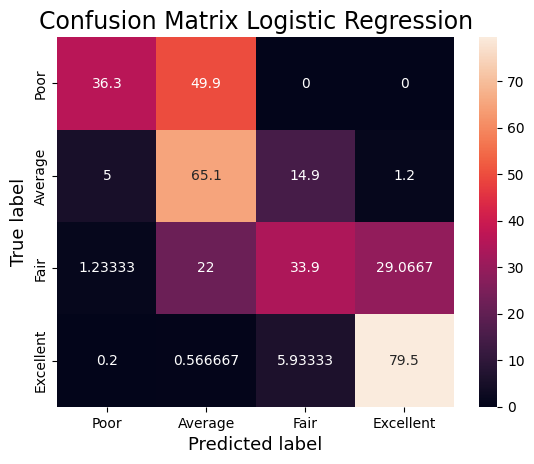

In [124]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# Define class labels
class_labels = ['Poor', 'Average', 'Fair', 'Excellent']



# Define the classifier
classifier = LogisticRegression()

# Define the number of folds and repeats
num_folds = 10
num_repeats = 3

# Create Repeated Stratified K-Fold cross-validator
rskf = RepeatedStratifiedKFold(n_splits=num_folds, n_repeats=num_repeats, random_state=42)

conf_matrices = []  # To store confusion matrices from each fold

# Perform cross-validation
for train_index, test_index in rskf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    # Fit the classifier on the training data
    classifier.fit(X_train, y_train)

    # Predict the labels of the test data
    y_pred = classifier.predict(X_test)

    # Compute confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    conf_matrices.append(conf_matrix)

# Compute average confusion matrix
avg_conf_matrix = np.mean(conf_matrices, axis=0)

# Plot confusion matrix with labels
sns.heatmap(avg_conf_matrix, annot=True, fmt='g', xticklabels=class_labels, yticklabels=class_labels)
plt.ylabel('True label', fontsize=13)
plt.xlabel('Predicted label', fontsize=13)
plt.title('Confusion Matrix Logistic Regression', fontsize=17)
plt.show()
   

DecisionTree

In [146]:
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier
import numpy as np

# Define the number of folds and repeats
num_folds = 10
num_repeats = 3

# Create Repeated Stratified K-Fold cross-validator
rskf = RepeatedStratifiedKFold(n_splits=num_folds, n_repeats=num_repeats, random_state=42)

# Define Decision Tree classifier
decision_tree_classifier = DecisionTreeClassifier()

# Perform cross-validation
cv_scores = cross_val_score(decision_tree_classifier, X, y, cv=rskf)

# Calculate mean and standard deviation of cross-validation scores
mean_accuracy = np.mean(cv_scores)
std_dev_accuracy = np.std(cv_scores)

print("Cross-validation scores:", cv_scores)
print("Mean accuracy:", mean_accuracy)
print("Standard deviation:", std_dev_accuracy)


Cross-validation scores: [1.         1.         0.9942029  1.         0.99710145 1.
 0.99710145 1.         1.         0.99709302 1.         1.
 0.9942029  1.         0.99710145 1.         0.99710145 1.
 0.99709302 1.         1.         0.99710145 0.99710145 0.99710145
 1.         0.9942029  1.         1.         1.         1.        ]
Mean accuracy: 0.9985501629030448
Standard deviation: 0.0019448267199066796


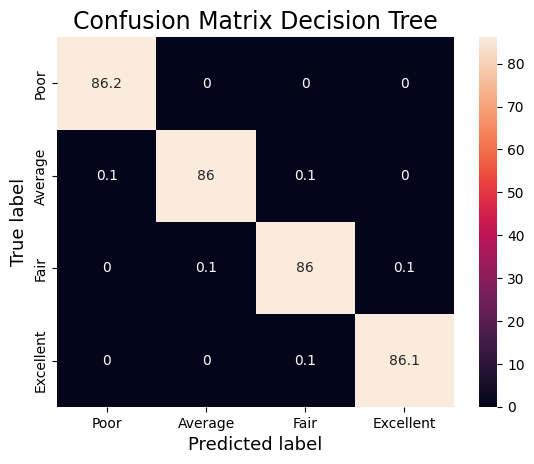

In [147]:
import numpy as np
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt



# Define the classifier
classifier = DecisionTreeClassifier()

# Define the number of folds and repeats
num_folds = 10
num_repeats = 3

# Create Repeated Stratified K-Fold cross-validator
rskf = RepeatedStratifiedKFold(n_splits=num_folds, n_repeats=num_repeats, random_state=42)

conf_matrices = []  # To store confusion matrices from each fold

# Perform cross-validation
for train_index, test_index in rskf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Fit the classifier on the training data
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)

    # Compute confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    conf_matrices.append(conf_matrix)

# Compute average confusion matrix
avg_conf_matrix = np.mean(conf_matrices, axis=0)

# Define class labels
class_labels = ['Poor', 'Average', 'Fair', 'Excellent']

# Plot confusion matrix with labels
sns.heatmap(avg_conf_matrix, annot=True, fmt='g', xticklabels=class_labels, yticklabels=class_labels)
plt.ylabel('True label', fontsize=13)
plt.xlabel('Predicted label', fontsize=13)
plt.title('Confusion Matrix Decision Tree', fontsize=17)
plt.show()


XGBoost:

In [149]:
import numpy as np
import xgboost as xgb
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
from sklearn.preprocessing import LabelEncoder

# Assuming X and y are your feature matrix and target vector, respectively

# Define the number of folds and repeats
num_folds = 10
num_repeats = 3

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode the target variable
y_encoded = label_encoder.fit_transform(y)

# Define XGBoost classifier
model = xgb.XGBClassifier(verbosity=0)

# Create Repeated Stratified K-Fold cross-validator
rskf = RepeatedStratifiedKFold(n_splits=num_folds, n_repeats=num_repeats, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(model, X, y_encoded, cv=rskf, n_jobs=-1)

# Calculate mean and standard deviation of cross-validation scores
mean_accuracy = np.mean(cv_scores)
std_dev_accuracy = np.std(cv_scores)

print("Cross-validation scores:", cv_scores)
print("Mean accuracy:", mean_accuracy)
print("Standard deviation:", std_dev_accuracy)


Cross-validation scores: [1.         1.         0.99710145 1.         0.99710145 1.
 0.99710145 1.         1.         1.         1.         1.
 0.99710145 1.         0.99710145 1.         1.         1.
 1.         1.         1.         0.99710145 0.99710145 0.99710145
 1.         0.99710145 1.         1.         1.         1.        ]
Mean accuracy: 0.9991304347826088
Standard deviation: 0.001328282810132103


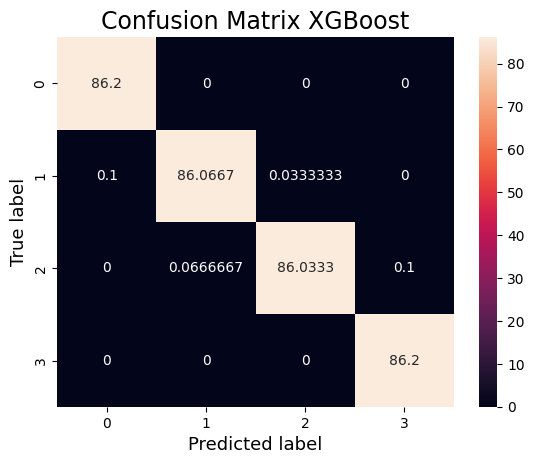

In [130]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb



# Encode class labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Define the classifier
classifier = xgb.XGBClassifier()

# Define the number of folds and repeats
num_folds = 10
num_repeats = 3

# Create Repeated Stratified K-Fold cross-validator
rskf = RepeatedStratifiedKFold(n_splits=num_folds, n_repeats=num_repeats, random_state=42)

conf_matrices = []  # To store confusion matrices from each fold

# Perform cross-validation
for train_index, test_index in rskf.split(X, y_encoded):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y_encoded[train_index], y_encoded[test_index]
    
    # Fit the classifier on the training data
    classifier.fit(X_train, y_train)

    # Predict the labels of the test data
    y_pred = classifier.predict(X_test)

    # Compute confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    conf_matrices.append(conf_matrix)

# Compute average confusion matrix
avg_conf_matrix = np.mean(conf_matrices, axis=0)

# Plot confusion matrix with labels
class_labels = label_encoder.classes_
sns.heatmap(avg_conf_matrix, annot=True, fmt='g', xticklabels=class_labels, yticklabels=class_labels)
plt.ylabel('True label', fontsize=13)
plt.xlabel('Predicted label', fontsize=13)
plt.title('Confusion Matrix XGBoost', fontsize=17)
plt.show()

CatBoostClassifier

In [150]:
import numpy as np
from catboost import CatBoostClassifier
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
from sklearn.preprocessing import LabelEncoder

# Assuming X and y are your feature matrix and target vector, respectively

# Define the number of folds and repeats
num_folds = 10
num_repeats = 3

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode the target variable
y_encoded = label_encoder.fit_transform(y)

# Define CatBoost classifier with verbose set to False to suppress training output
model = CatBoostClassifier(verbose=False)

# Create Repeated Stratified K-Fold cross-validator
skf = RepeatedStratifiedKFold(n_splits=num_folds, n_repeats=num_repeats, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(model, X, y_encoded, cv=skf, n_jobs=-1)

# Calculate mean and standard deviation of cross-validation scores
mean_accuracy = np.mean(cv_scores)
std_dev_accuracy = np.std(cv_scores)

print("Cross-validation scores:", cv_scores)
print("Mean accuracy:", mean_accuracy)
print("Standard deviation:", std_dev_accuracy)


Cross-validation scores: [0.99710145 1.         1.         1.         0.99710145 1.
 0.99710145 1.         1.         0.99709302 1.         1.
 1.         1.         0.99710145 1.         0.99710145 1.
 0.99709302 0.99709302 0.99710145 1.         0.99710145 0.9942029
 1.         0.9942029  1.         1.         1.         1.        ]
Mean accuracy: 0.9986465003932142
Standard deviation: 0.0017927320896339854


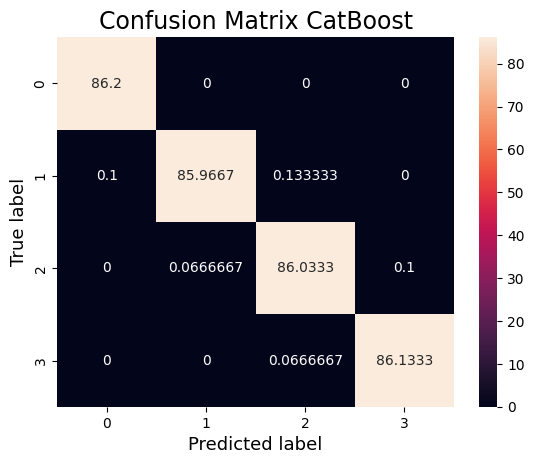

In [144]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import confusion_matrix
from catboost import CatBoostClassifier


# Define the classifier
classifier = CatBoostClassifier(verbose=False)

# Define the number of folds and repeats
num_folds = 10
num_repeats = 3

# Create Repeated Stratified K-Fold cross-validator
rskf = RepeatedStratifiedKFold(n_splits=num_folds, n_repeats=num_repeats, random_state=42)

conf_matrices = []  # To store confusion matrices from each fold

# Perform cross-validation
for train_index, test_index in rskf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Fit the classifier on the training data
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)

    # Compute confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    conf_matrices.append(conf_matrix)

# Compute average confusion matrix
avg_conf_matrix = np.mean(conf_matrices, axis=0)

# Plot confusion matrix with labels
class_labels = classifier.classes_
sns.heatmap(avg_conf_matrix, annot=True, fmt='g', xticklabels=class_labels, yticklabels=class_labels)
plt.ylabel('True label', fontsize=13)
plt.xlabel('Predicted label', fontsize=13)
plt.title('Confusion Matrix CatBoost', fontsize=17)
plt.show()
